## Importing Dependencies and Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [ ]:
#reading csv file
df = pd.read_csv("a.csv")

# EDA

### Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their key characteristics, detect patterns, spot anomalies, and check for missing values before proceeding with further analysis or model building.


- df.describe() provides a statistical summary of numerical features, including count, mean, standard deviation, minimum, quartiles, and maximum values, helping to identify distributions, outliers, and scaling issues.

- df.info() displays column names, data types, non-null counts, and memory usage, making it useful for detecting missing values, categorical vs. numerical features, and overall dataset structure.

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


---

- Feature Scaling Required – The numerical columns in the dataset have different ranges (e.g., Monthly Income: 102–2068, Age: 18–60, Years at Company: 0–40), which can cause biased model training. Standardization or normalization is needed to ensure all features contribute equally to the model.



-  Ordinal Categorical Columns – Some columns may appear numerical but are actually ordinal categorical variables, meaning their values represent ranked categories rather than true numerical intervals. These include **Job Level, Job Involvement, Work-Life Balance, Environment Satisfaction, Job Satisfaction, and Performance Rating**. Proper encoding is required to retain their ordinal nature.


- These columns are not truly numerical because their intervals do not represent equal differences in real-world meaning. For instance, in the Work-Life Balance feature, moving from 1 to 2 does not indicate the same level of improvement as moving from 3 to 4. This confirms that these variables should be treated as ordinal categories rather than continuous numerical features.

---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237




---



-  The dataset shows a highly imbalanced distribution, with 1,233 instances of the "No" class and only 237 instances of the "Yes" class, indicating that attrition is much less frequent and may require techniques like resampling, cost-sensitive learning, or specialized loss functions (e.g., Focal Loss) to handle class imbalance effectively.


- Since maintaining data authenticity is crucial, we cannot apply resampling techniques like SMOTE (which synthetically generates data) or undersampling (which removes valuable information), as these could distort real-world patterns and impact the reliability of insights derived from the dataset.


- We will construct a neural network using PyTorch that incorporates Focal Loss instead of the conventional Binary Cross-Entropy (BCE) loss. This approach is specifically chosen to address class imbalance in the dataset by reducing the impact of well-classified examples and focusing more on hard-to-classify instances.
---


In [ ]:
# moving the target variable to the last position in dataframe
df['Attrition'] = df.pop('Attrition')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


---

**- Dropping Unnecessary Columns**  
  - The following columns are dropped as they do not provide meaningful information for modeling:  
    - **"Over18"**: All employees are over 18, making this redundant.  
    - **"EmployeeCount" & "StandardHours"**: These have constant values across all rows, adding no predictive value.  
    - **"EmployeeNumber"**: A unique identifier that does not contribute to learning patterns.  
---
**- Defining Ordinal Features**  
  - Some categorical variables follow a meaningful ranking but are not truly numerical.  
  - Examples:  
    - **"Education"** (1 = Below College, 5 = Doctorate)  
    - **"JobSatisfaction"**, **"WorkLifeBalance"** (Higher values indicate better satisfaction/balance)  
---
**- Specifying Ordinal Categories for Encoding**  
  - The **ordinal_categories** list explicitly defines the ranking order for proper encoding.  
  - This ensures models interpret these features correctly instead of treating them as arbitrary labels.  
---
**- Defining Nominal Features**  
  - These categorical variables do not have an inherent order and require one-hot encoding.  
  - Examples:  
    - **"BusinessTravel"**, **"Department"**, **"MaritalStatus"**, **"OverTime"**  
---
**- Defining Numerical Features**  
  - These variables are truly numerical and should be scaled due to different value ranges.  
  - Examples:  
    - **"Age"**, **"MonthlyIncome"**, **"YearsAtCompany"**, **"TotalWorkingYears"**  
---

In [ ]:
df = df.drop(columns=["Over18", "EmployeeCount", "StandardHours", "EmployeeNumber"], errors="ignore")


ordinal_features = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
                    "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
            "StockOptionLevel", "WorkLifeBalance"]

##   Ordinal Encoder needs to know the order of categories in each ordinal columsn
ordinal_categories = [[1, 2, 3, 4, 5],  # Education (1 = Below College, 5 = Doctor)
                      [1, 2, 3, 4],     # EnvironmentSatisfaction (1 = Low, 4 = Very High)
                      [1, 2, 3, 4],     # JobInvolvement
                      [1, 2, 3, 4, 5],  # JobLevel
                      [1, 2, 3, 4],     # JobSatisfaction
                      [1, 2, 3, 4],     # PerformanceRating
                      [1, 2, 3, 4],     # RelationshipSatisfaction
                      [0, 1, 2, 3],     # StockOptionLevel
                      [1, 2, 3, 4]]     # WorkLifeBalance

nominal_features = [ "BusinessTravel", "Department", "EducationField",
                    "Gender", "JobRole", "MaritalStatus", "OverTime"]

numerical_features = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome",
                      "MonthlyRate", "PercentSalaryHike", "TotalWorkingYears",
                      "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole",
                      "YearsSinceLastPromotion", "YearsWithCurrManager", "NumCompaniesWorked"]


# 1.1. Understanding Trends and patterns
     

## For Numerical Features

#### Univariate Analysis

- **Understanding the distribution of numerical variables helps analyze their skewness, spread, and central tendency**, providing insights into data patterns and potential preprocessing needs.


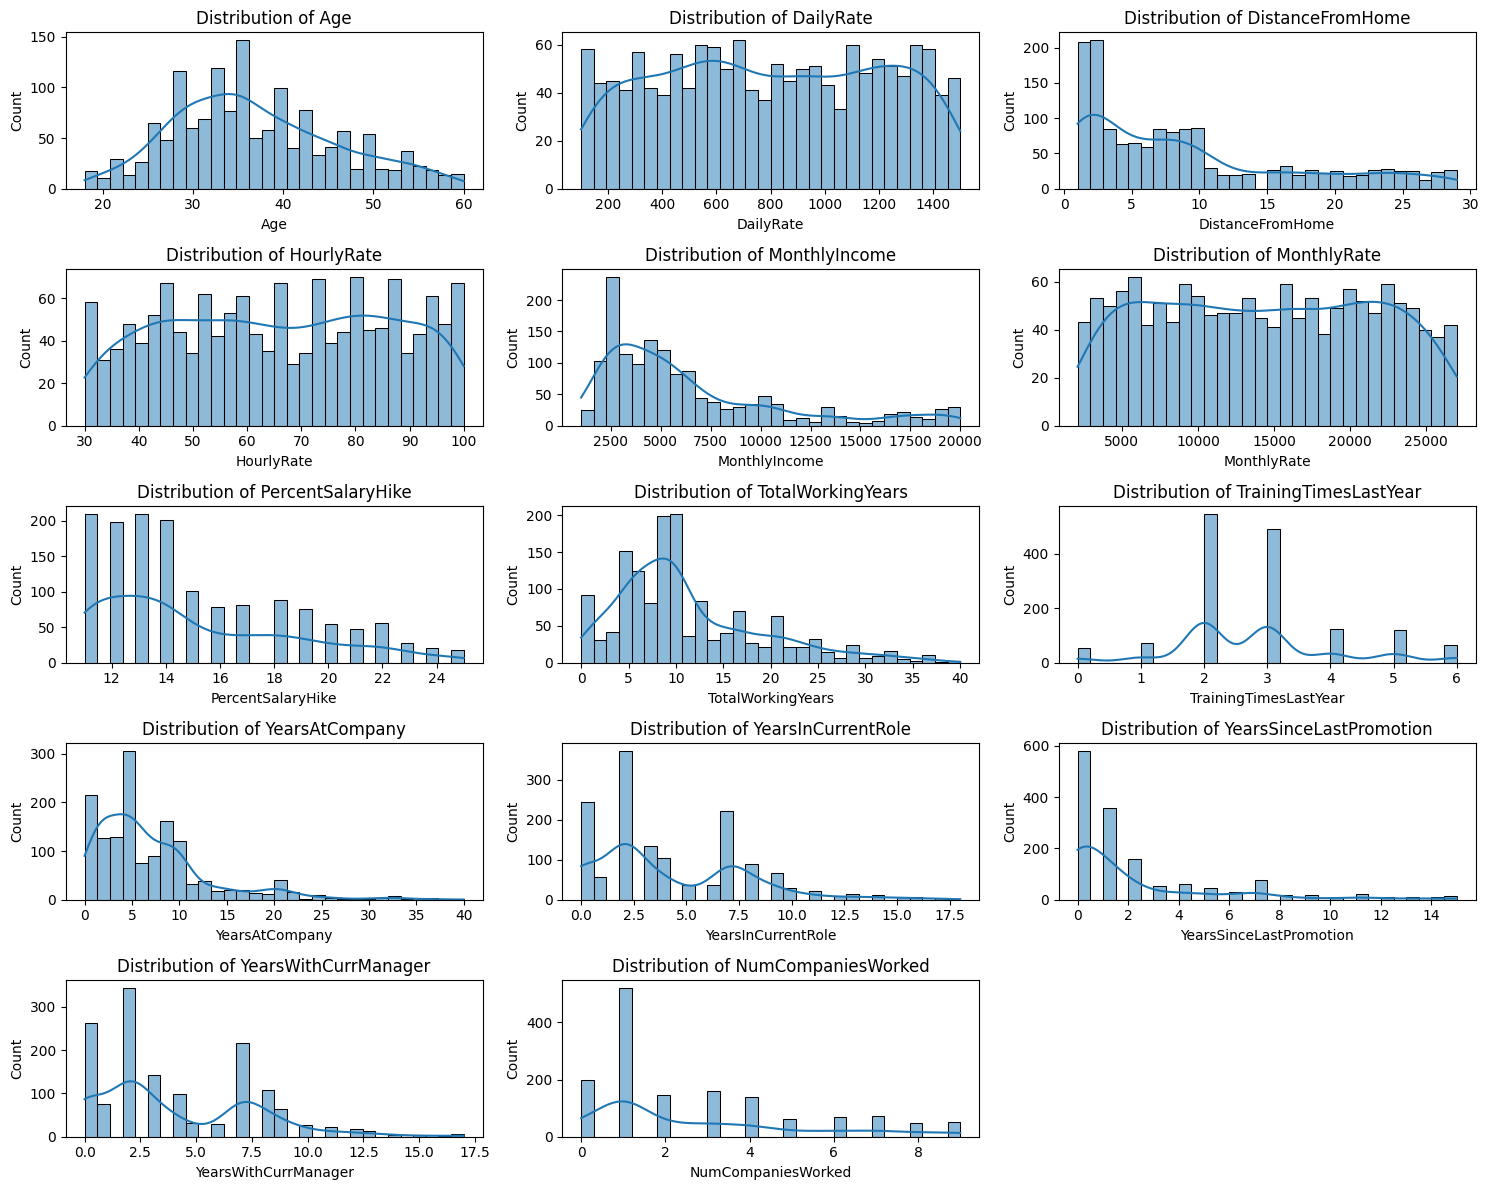

In [ ]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

---
## Insights from Univariate Analysis

- **Normally Distributed or Uniform Features** :
The features Age, DailyRate, and HourlyRate exhibit approximately normal or uniform distributions, indicating a balanced spread of values.

- **Right-Skewed Features**  :
  Several features (**DistanceFromHome, MonthlyIncome, MonthlyRate, PercentSalaryHike, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, and NumCompaniesWorked**) show a right-skewed distribution, meaning most values are concentrated towards the lower range with a few higher values.  

- **Normalization Strategy**  :
To address skewness and improve the normality of data, log transformation will be considered where necessary. This step will be implemented after bivariate analysis and the removal of irrelevant and redundant numerical columns to ensure data consistency.

---

# Bivariate Analysis between numerical feature and target variable

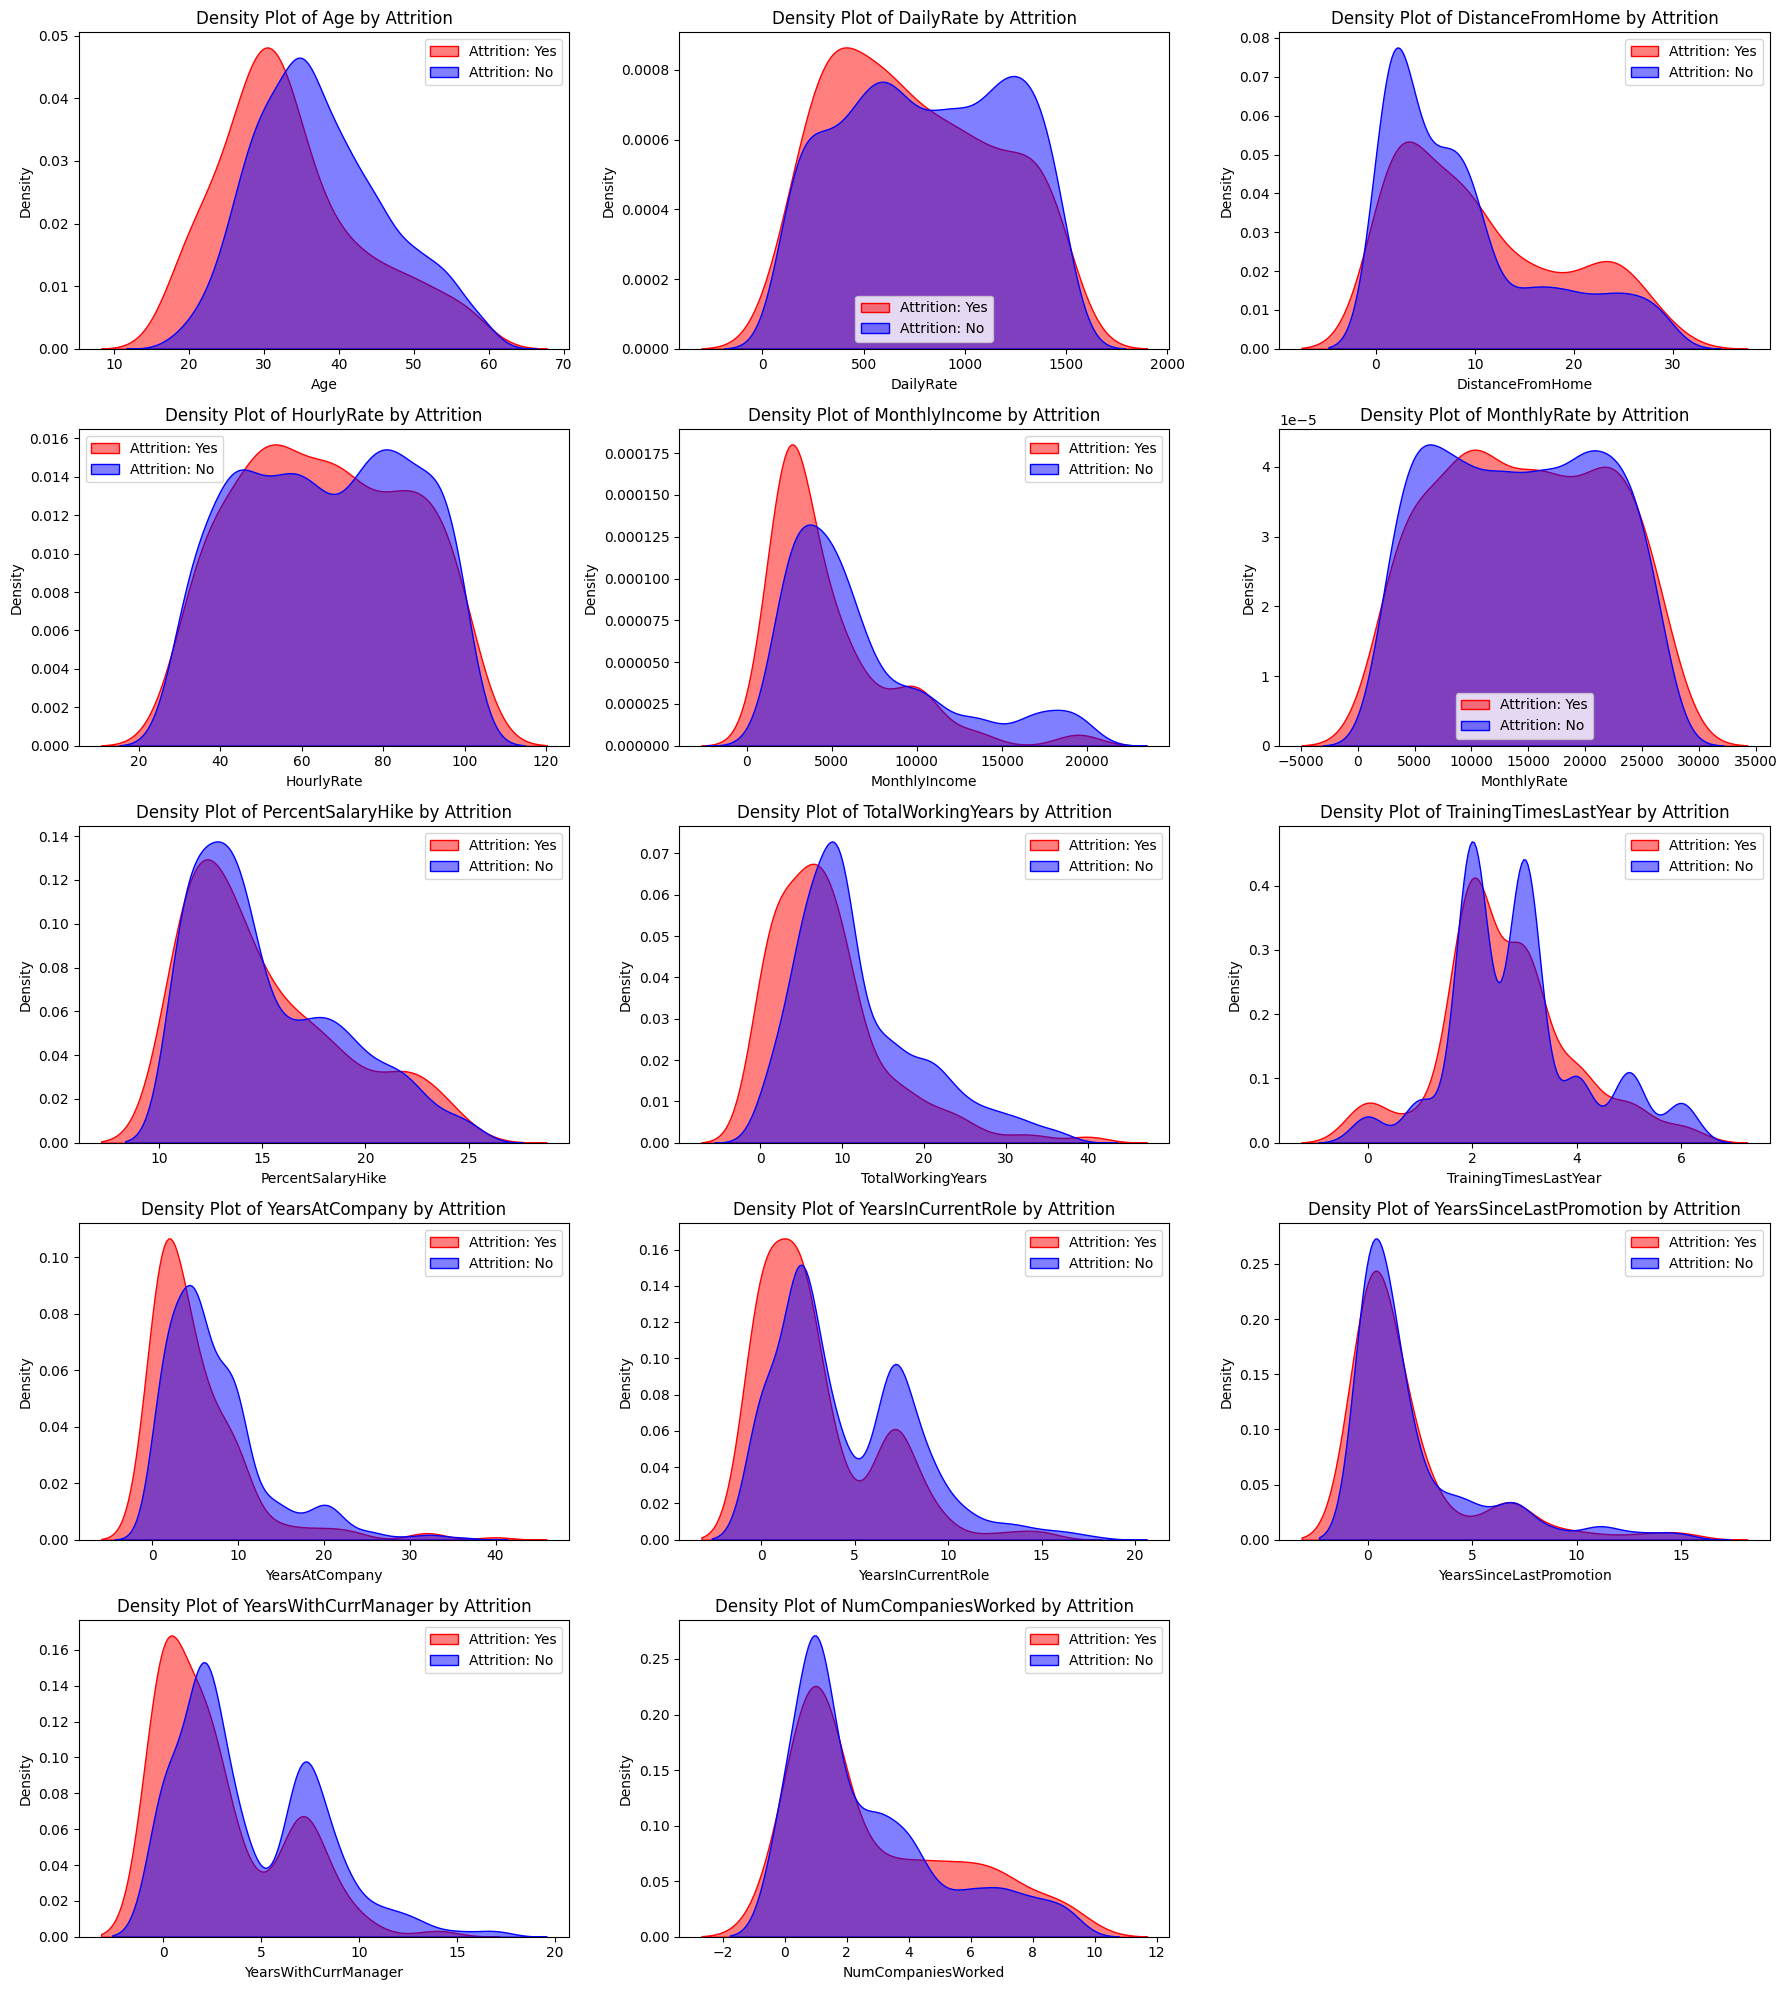

In [ ]:
num_features = numerical_features
cols = 3
rows = math.ceil(len(num_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()
for i, col in enumerate(num_features):
    sns.kdeplot(df[df["Attrition"] == "Yes"][col], label="Attrition: Yes", fill=True, ax=axes[i], color="red", alpha=0.5)
    sns.kdeplot(df[df["Attrition"] == "No"][col], label="Attrition: No", fill=True, ax=axes[i], color="blue", alpha=0.5)

    axes[i].set_title(f"Density Plot of {col} by Attrition")
    axes[i].legend()
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
# Feature Selection Based on KDE Plots

These KDE (Kernel Density Estimation) plots compare the distribution of numerical features between employees who left the company (**Attrition: Yes**) and those who stayed (**Attrition: No**). The **red** curve represents employees who left, while the **blue** curve represents those who stayed.

## Selected Features (Good Predictive Power)
- **Age** - Noticeable difference in distributions.
- **MonthlyIncome** - Clear separation between groups.
- **TotalWorkingYears** - Different distributions suggest impact on attrition.
- **YearsAtCompany** - Some separation indicating tenure influence.
- **YearsInCurrentRole** - Shows distinct peaks, relevant for role stagnation.
- **YearsWithCurrManager** - Good separation, indicating manager influence.
- **NumCompaniesWorked** - Different distribution suggests job-hopping tendencies.
- **TrainingTimesLastYear** - Some variation, could be useful.
- **YearsSinceLastPromotion** - Some visible differences in density.
- **DistanceFromHome** - Somewhat useful, though overlap exists.
- **PercentSalaryHike** - Slightly useful, but not highly predictive.

## Dropped Features (High Overlap, Less Predictive)
- **DailyRate** - Almost complete overlap.
- **HourlyRate** - No visible separation.
- **MonthlyRate** - High overlap, redundant with MonthlyIncome.
---

In [ ]:
df = df.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate' ])

df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,...,4,1,6,3,3,2,2,2,2,No


In [ ]:
numerical_features= ["Age",  "DistanceFromHome",  "MonthlyIncome",
                       "PercentSalaryHike", "TotalWorkingYears",
                      "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole","YearsSinceLastPromotion" ,
                   "YearsWithCurrManager", "NumCompaniesWorked"]


# Bivariate Analysis between numerical features





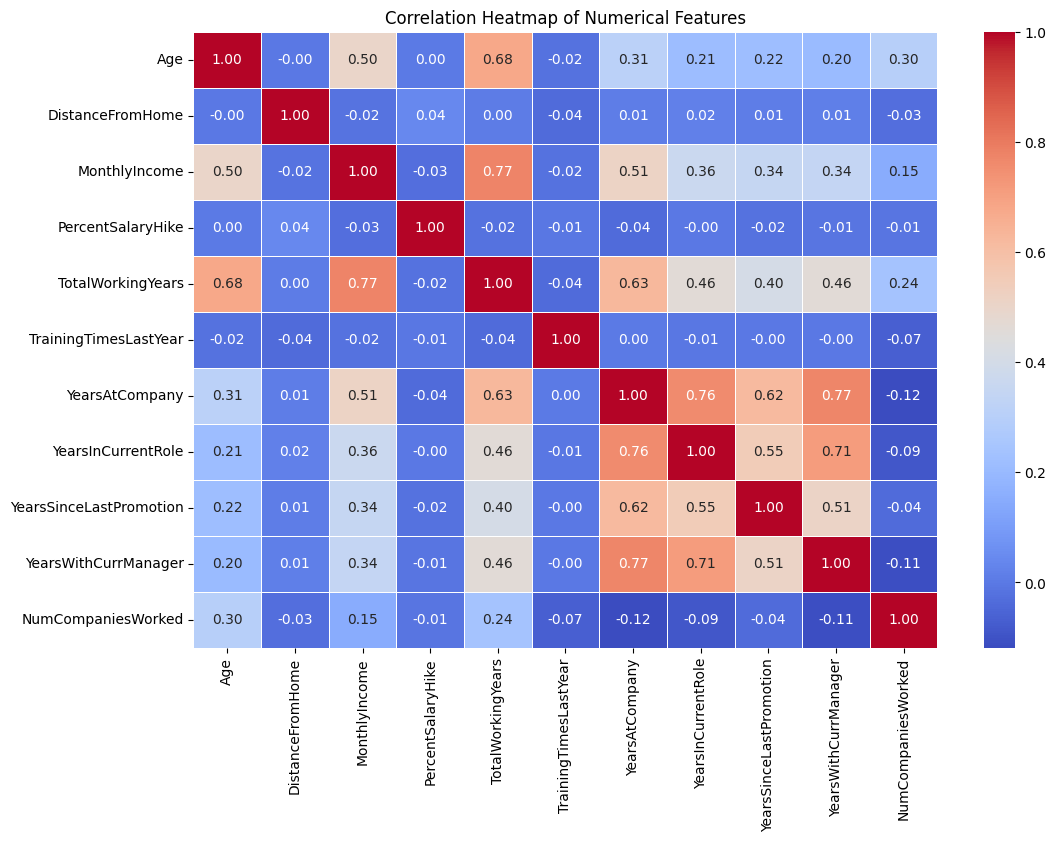

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Correlation between numerical features

---
## Removal of "YearsSinceLastPromotion" Column

The **YearsSinceLastPromotion** column is being removed due to the following reasons:

1. **High Correlation with Other Features**  
   - The feature shows strong correlations with **YearsAtCompany (0.62), YearsInCurrentRole (0.55), and YearsWithCurrManager (0.51)**.  
   - Keeping it would introduce redundancy and multicollinearity, which can negatively impact model performance.

2. **Low Predictive Power for Attrition**  
   - The KDE (Kernel Density Estimation) plot of **YearsSinceLastPromotion** against attrition shows a highly overlapping distribution.  
   - This indicates that it does not significantly differentiate between employees who left and those who stayed, making it less useful for
   prediction.
---

In [ ]:
df = df.drop(columns=["YearsSinceLastPromotion"])

## Final Numerical features

numerical_features= ["Age",  "DistanceFromHome",  "MonthlyIncome",
                       "PercentSalaryHike", "TotalWorkingYears",
                      "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole",
                   "YearsWithCurrManager", "NumCompaniesWorked"]




# For Categorical Features



## Univariate Analysis

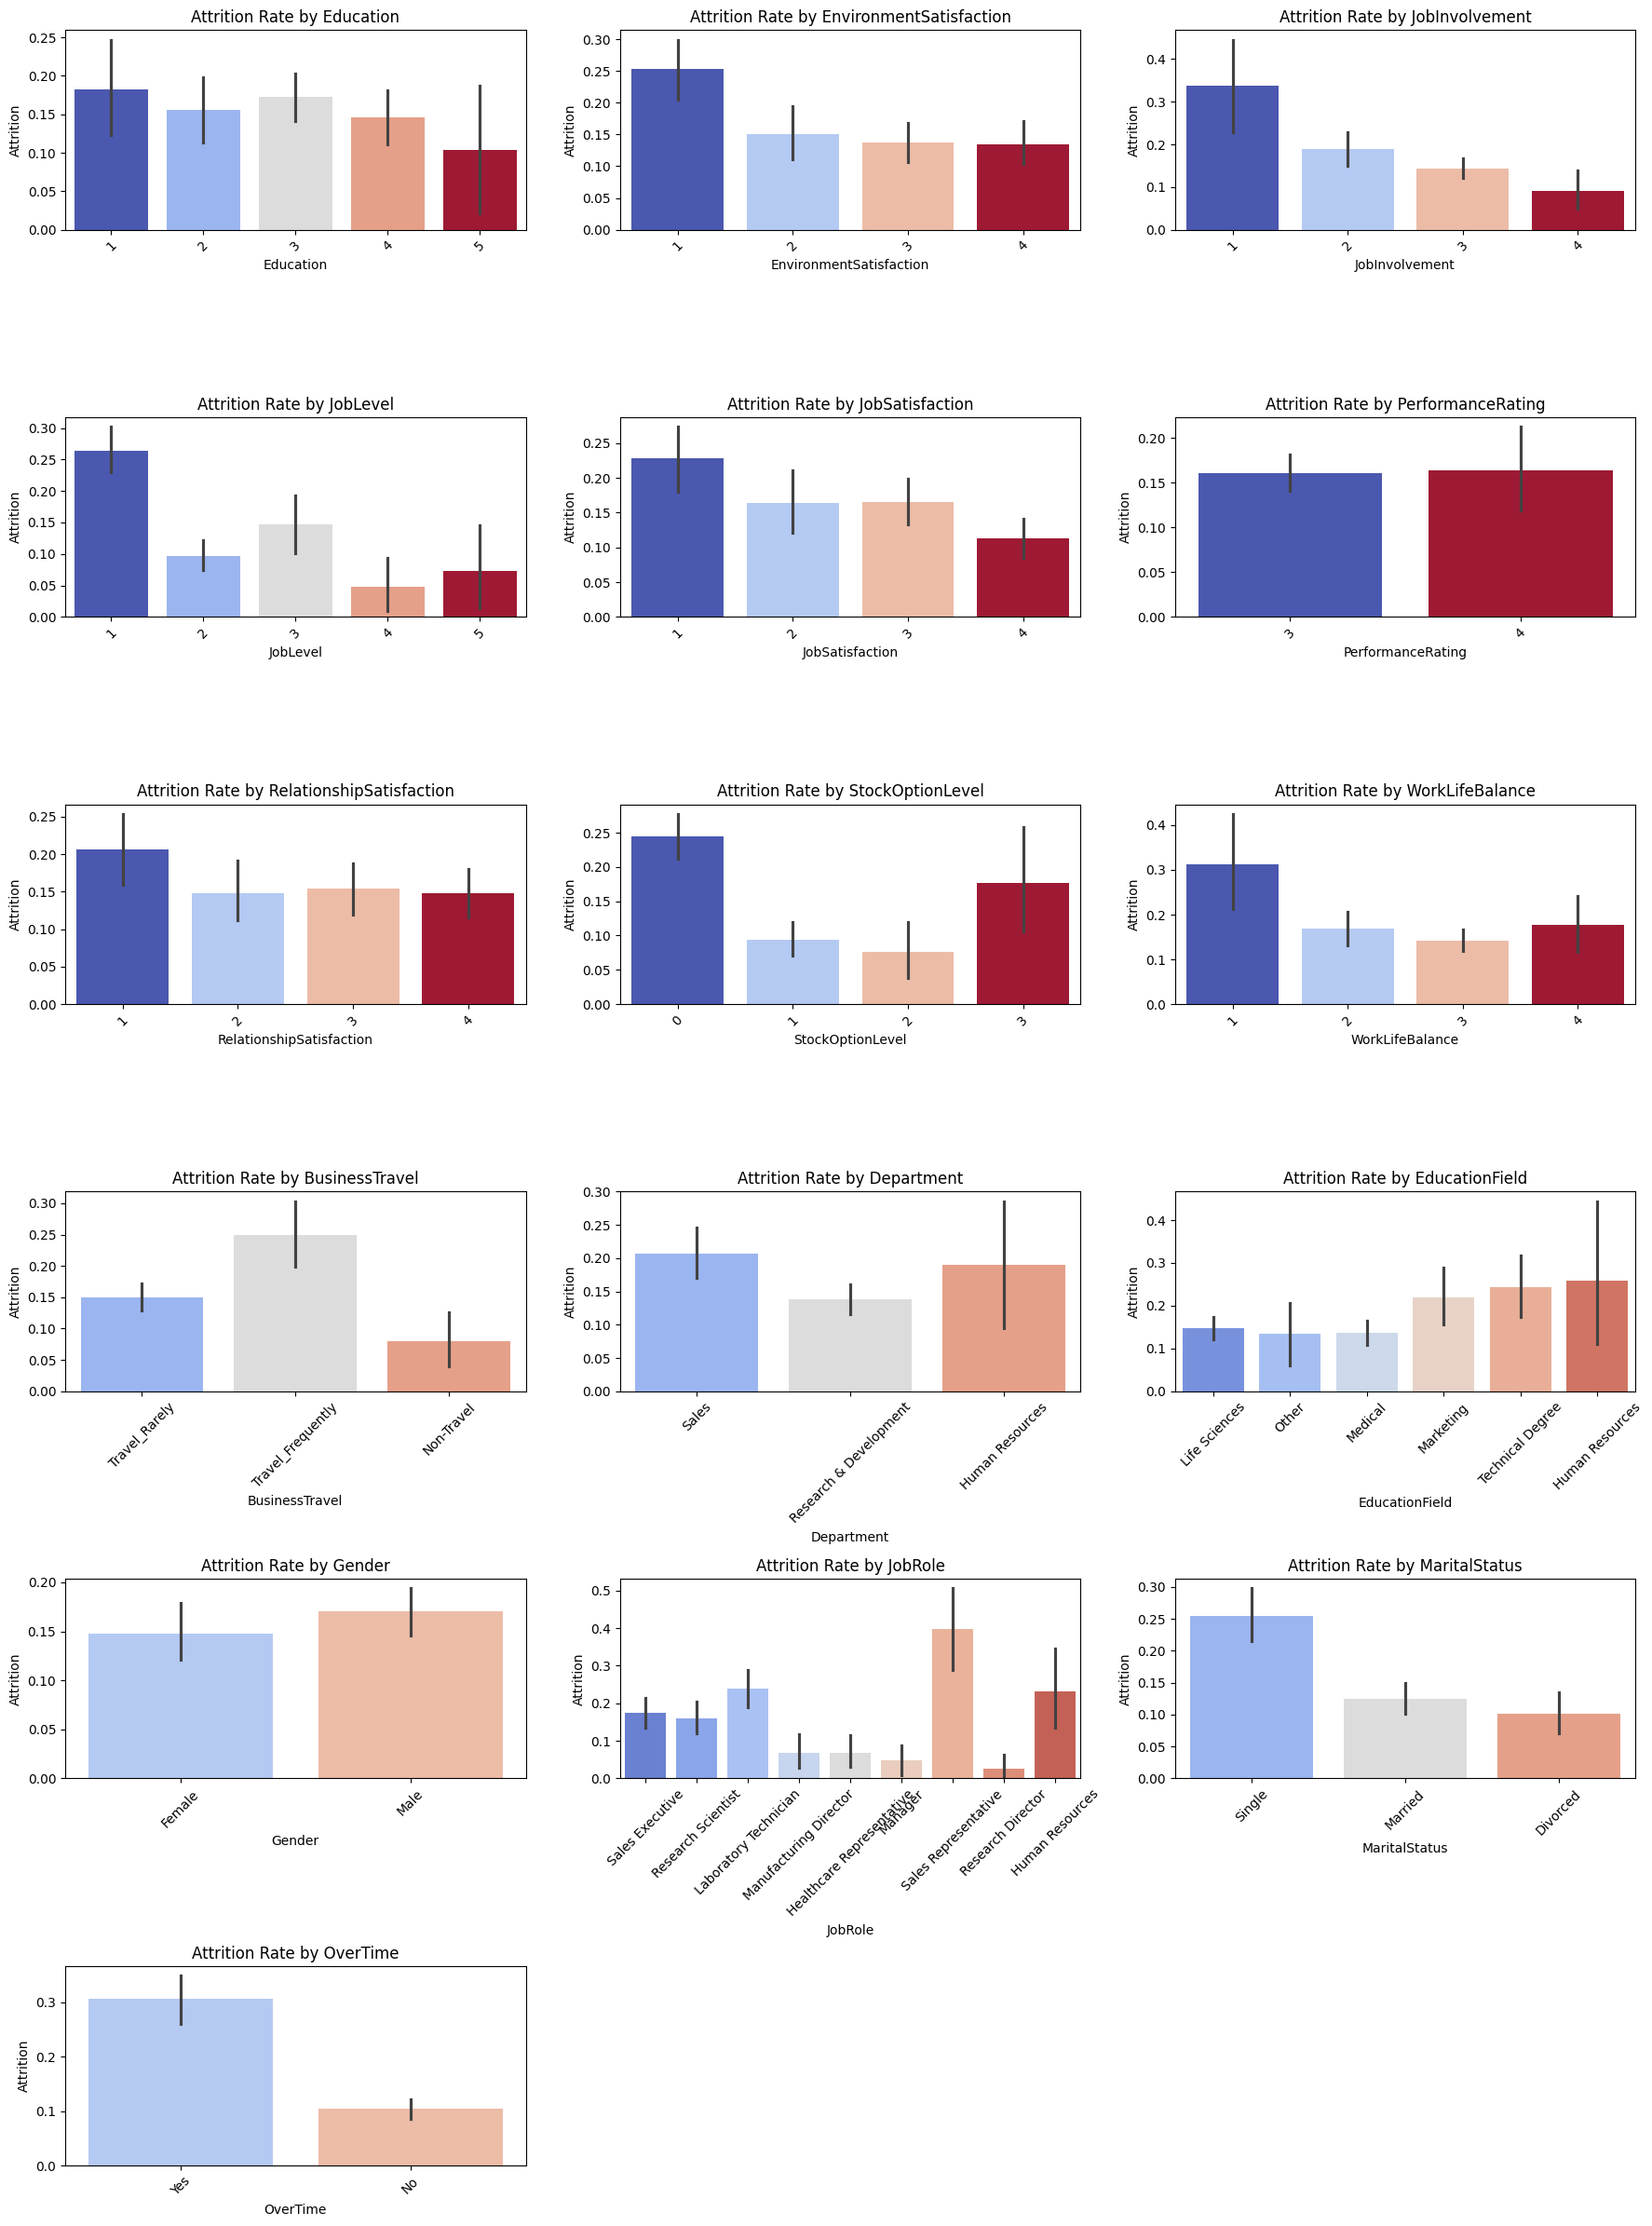

In [ ]:
cat_features = ordinal_features + nominal_features
cols = 3
rows = math.ceil(len(cat_features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.barplot(x=df[col], y=df["Attrition"].map({"Yes": 1, "No": 0}), hue=df[col], dodge=False, palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Attrition Rate by {col}")
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend([], [], frameon=False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
## Insights from Categorical Features and Attrition

The plots illustrate the **attrition rate** across various categorical features, showing how different groups experience employee turnover. Here are key observations:

- **OverTime**: Employees who work overtime have a significantly higher attrition rate.
- **BusinessTravel**: Frequent travelers have a higher likelihood of leaving compared to those who travel rarely or never.
- **JobRole & Department**: Certain roles and departments (e.g., Sales, Human Resources) show higher attrition rates.
- **MaritalStatus**: Single employees tend to leave more frequently than married or divorced employees.
- **EducationField**: Employees from Marketing and Human Resources show relatively higher attrition.
- **WorkLifeBalance, JobSatisfaction, and EnvironmentSatisfaction**: Lower satisfaction levels are linked to higher attrition.
- **StockOptionLevel & JobLevel**: Employees with lower job levels or fewer stock options tend to leave more.
- **Education**: No clear trend indicating a strong influence on attrition.

### Removal of "Gender" and "PerformanceRating"

1. **Gender**  
   - The attrition rate for males and females is nearly identical, meaning it does not contribute significantly to predicting attrition.
   - Keeping it could introduce bias without improving model performance.

2. **PerformanceRating**  
   - The plot shows **no significant variation in attrition** across different performance ratings.
   - Most employees likely receive similar ratings, making it a weak predictor.
---

In [ ]:
df = df.drop(columns=['Gender','PerformanceRating'])



In [ ]:
## Final Ordinal and Nominal Features

ordinal_features = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
                    "JobSatisfaction",  "RelationshipSatisfaction",
            "StockOptionLevel", "WorkLifeBalance"]


nominal_features = [ "BusinessTravel", "Department", "EducationField",
                     "JobRole", "MaritalStatus", "OverTime"]

ordinal_categories = [[1, 2, 3, 4, 5],  # Education (1 = Below College, 5 = Doctor)
                      [1, 2, 3, 4],     # EnvironmentSatisfaction (1 = Low, 4 = Very High)
                      [1, 2, 3, 4],     # JobInvolvement
                      [1, 2, 3, 4, 5],  # JobLevel
                      [1, 2, 3, 4],     # JobSatisfaction
                      [1, 2, 3, 4],     # RelationshipSatisfaction
                      [0, 1, 2, 3],     # StockOptionLevel
                      [1, 2, 3, 4]]     # WorkLifeBalance





### Missing Values Check

- **There are no missing values**

In [ ]:
df.isna().sum()

,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
JobInvolvement,0
JobLevel,0
JobRole,0


### 1.3. Outlier Detection and Handling

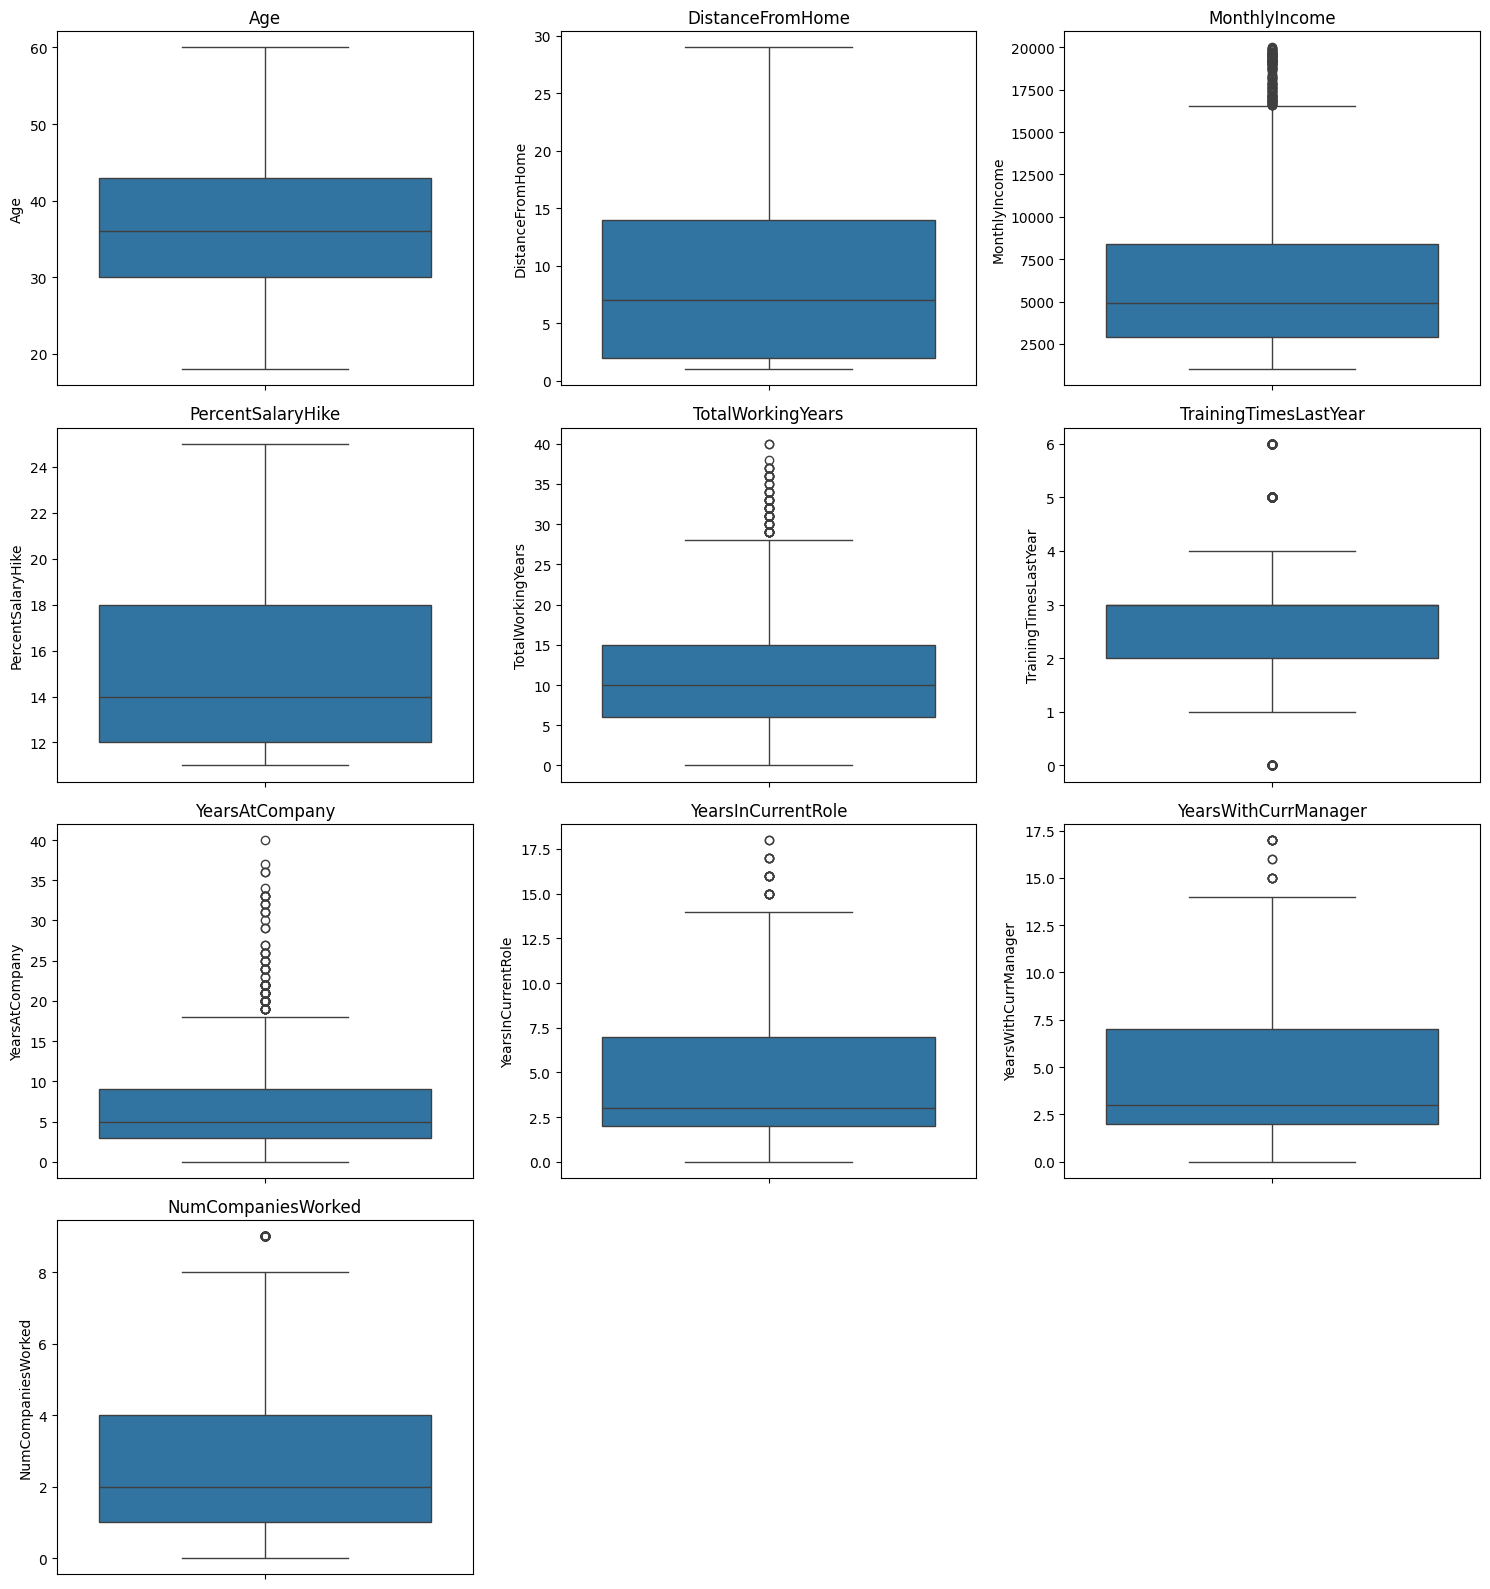

In [ ]:

num_plots = len(numerical_features)
rows = (num_plots // 3) + 1
cols = 3

plt.figure(figsize=(15, rows * 4))


for i, col in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


---
## Handling Outliers in Numerical Features  

From the above box plots, we can see that several features contain outliers. To handle them, we are using the following approaches:


### Methods to Handle Outliers  
1. **Log Transformation**: Applied to features that are heavily right-skewed to normalize their distribution.
2. **Capping Method**: Applied to features that are not heavily skewed to limit extreme values.
> ### We cannot trim these outliers as we might loose valuable information

---

### Outlier Analysis and Handling Strategy  

| Feature                | Skewness | Handling Method |
|------------------------|----------|----------------|
| **MonthlyIncome**      | Right Skewed  | Log Transform |
| **TotalWorkingYears**  | Right Skewed  | Log Transform |
| **YearsAtCompany**     | Right Skewed  | Log Transform |
| **YearsInCurrentRole** | Not Right Skewed | Capping Method |
| **YearsWithCurrManager** | Right Skewed | Log Transform |
| **NumCompaniesWorked** | Right Skewed | Log Transform |
| **TrainingTimesLastYear** | Not Right Skewed | Capping Method |

### Conclusion  
- **Log transformation** is applied to highly skewed features to reduce the effect of outliers and bring distributions closer to normal.  
- **Capping method** is applied to features that are not heavily skewed, limiting extreme values while maintaining the overall distribution.  
---

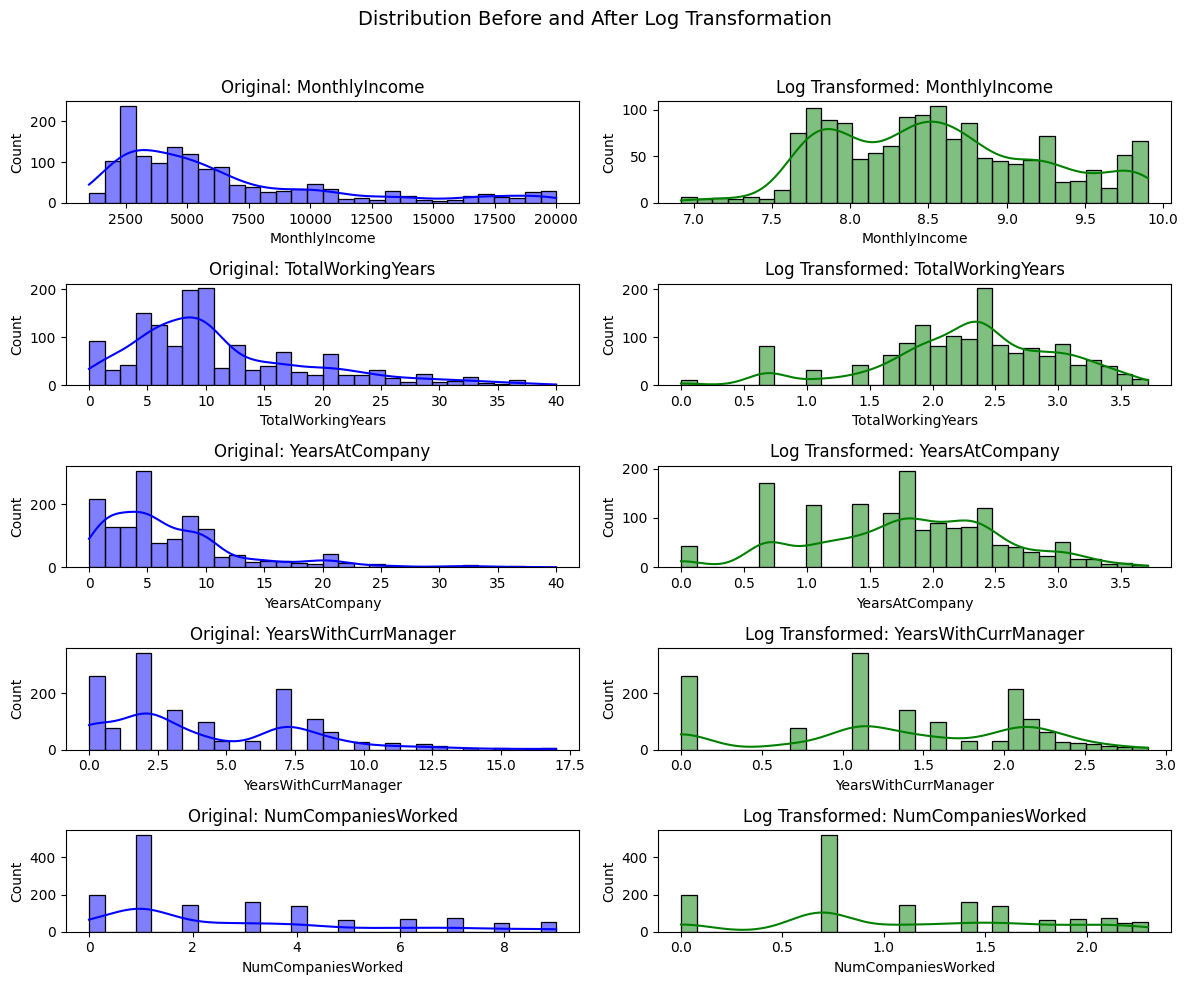

In [ ]:
columns_to_log = ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany",
                 "YearsWithCurrManager", "NumCompaniesWorked"]


fig, axes = plt.subplots(len(columns_to_log), 2, figsize=(12, 10))
fig.suptitle("Distribution Before and After Log Transformation", fontsize=14)

for i, col in enumerate(columns_to_log):

    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color="blue")
    axes[i, 0].set_title(f"Original: {col}")


    df[col] = np.log1p(df[col])  # log1p(x) = log(1 + x)

    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 1], color="green")
    axes[i, 1].set_title(f"Log Transformed: {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


---
## Conclusions from Log Transformation  

1. **Normalization of Distribution**:  
   - Before log transformation, the features **MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, and NumCompaniesWorked** were heavily right-skewed.  
   - After applying log transformation, these distributions have become more normalized, making them more suitable for machine learning models that assume normality.  

2. **Reduction of Outliers' Influence**:  
   - The extreme values (outliers) in the original distributions had a significant impact on the dataset.  
   - After log transformation, the spread of the data is more balanced, reducing the impact of extreme values while preserving meaningful variations in the data.  
---

In [ ]:
def cap_outliers(df, column):

    df[column] = pd.to_numeric(df[column], errors='coerce')

    df[column] = df[column].fillna(df[column].median())

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])



cap_outliers(df, 'TrainingTimesLastYear')
cap_outliers(df, 'YearsInCurrentRole')


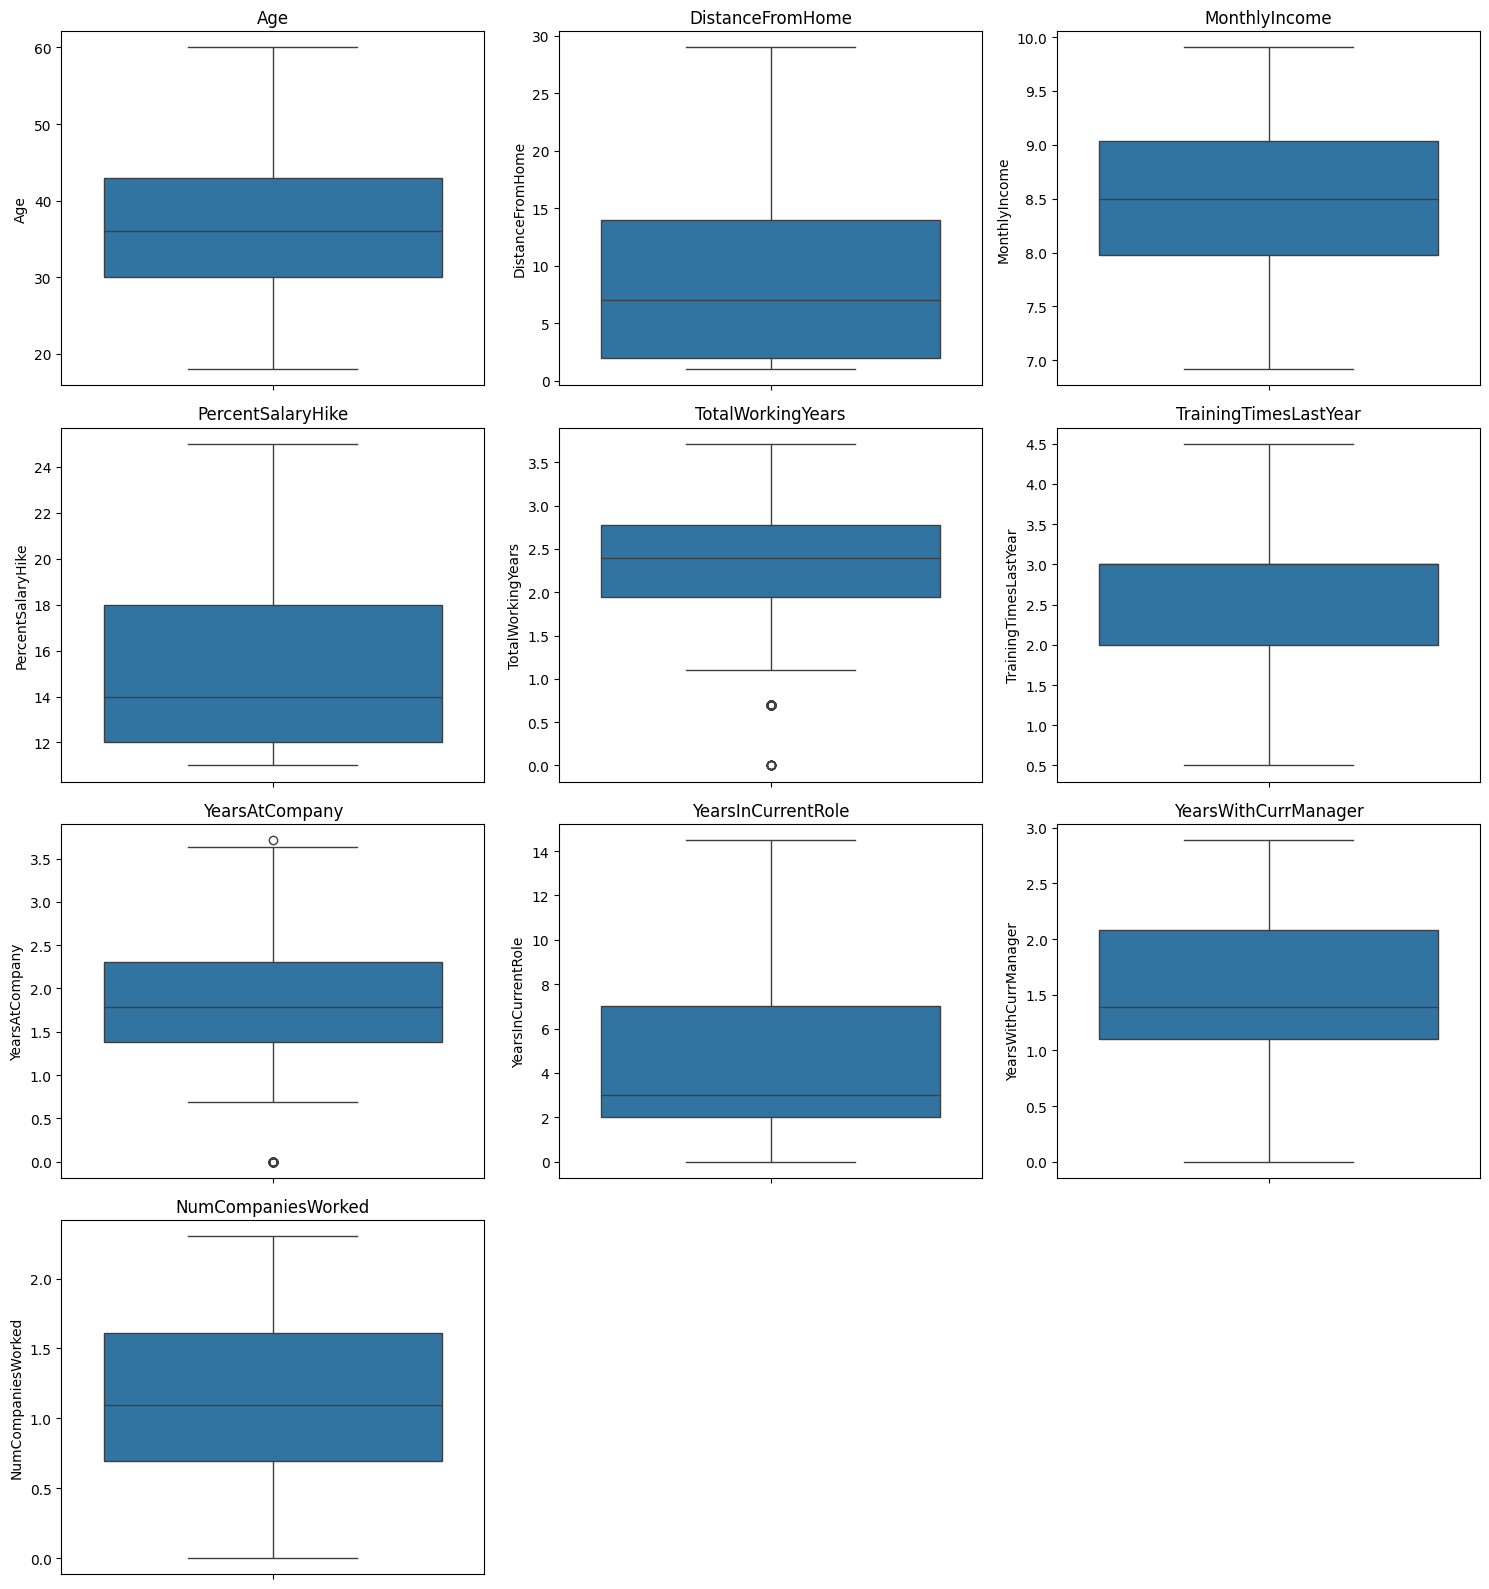

In [ ]:

num_plots = len(numerical_features)
rows = (num_plots // 3) + 1
cols = 3

plt.figure(figsize=(15, rows * 4))


for i, col in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


---

## Conclusions After Handling Outliers  

1. **Effective Log Transformation for Most Features**:  
   - The log transformation significantly reduced skewness and normalized the distributions for features such as **MonthlyIncome, YearsWithCurrManager, and NumCompaniesWorked**.  
   - However, for **TotalWorkingYears and YearsAtCompany**, the log transformation did not fully eliminate extreme values, indicating that these features still had strong outliers.

2. **Capping Outliers in TotalWorkingYears and YearsAtCompany**:  
   - Since log transformation did not sufficiently normalize **TotalWorkingYears and YearsAtCompany**, capping was applied to limit extreme values.  
   - In the final box plots, these features now show reduced outliers, confirming that the capping method successfully controlled extreme values without distorting the main distribution.  
   - This ensures that our data remains meaningful while preventing high variance issues caused by extreme outliers.
---

In [ ]:
cap_outliers(df, "TotalWorkingYears")
cap_outliers(df, "YearsAtCompany")

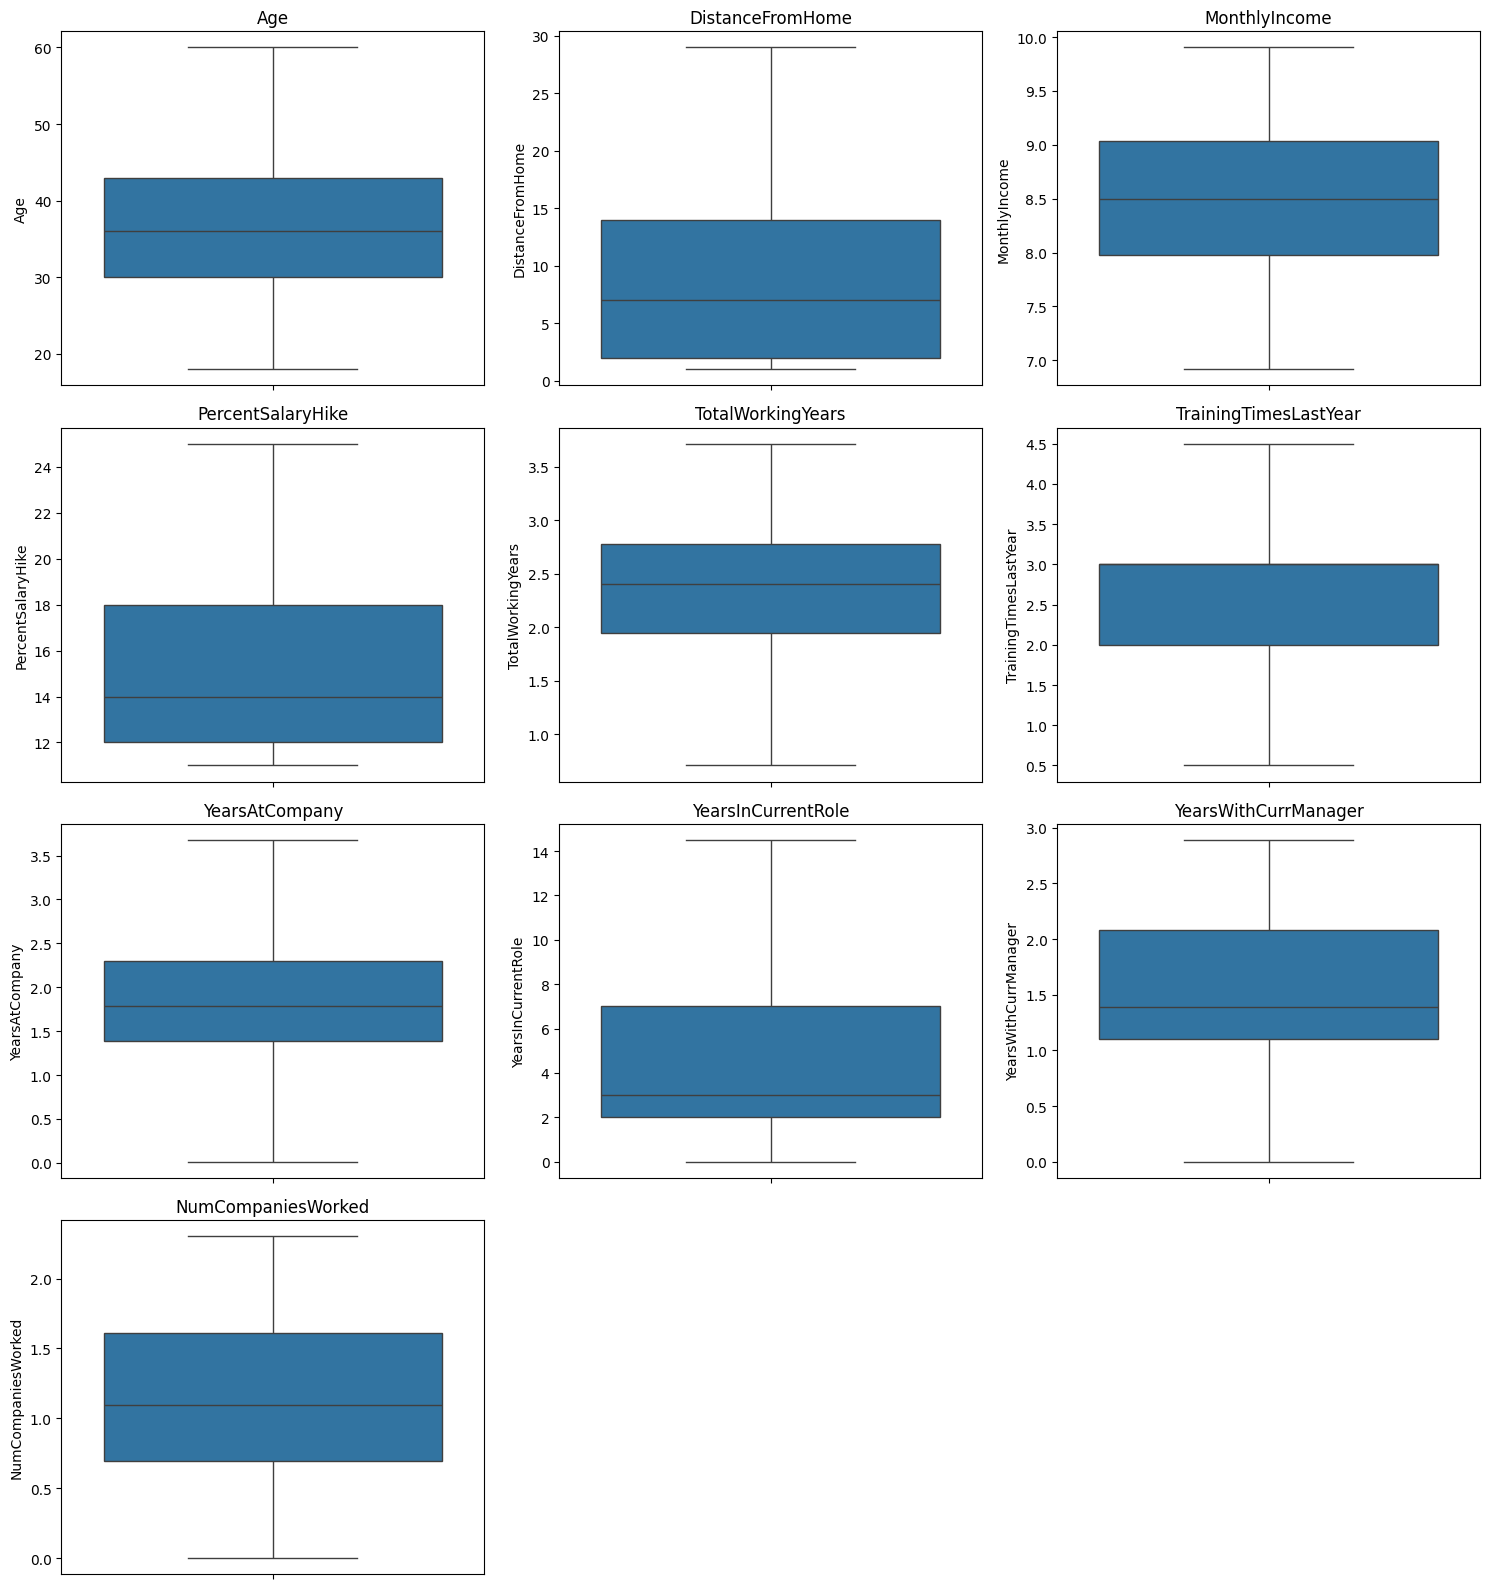

In [ ]:

num_plots = len(numerical_features)
rows = (num_plots // 3) + 1
cols = 3

plt.figure(figsize=(15, rows * 4))


for i, col in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


## No outliers present for any numerical feature

# PreProcessing :

## Encoding categorical variables and scaling numerical variables

- **Encoding Categorical Variables:**  
  - The target variable (*Attrition*) is separated from the features.  
  - *Ordinal Encoding* is applied to ordinal categorical variables using OrdinalEncoder(), which assigns numerical values based on order.  
  - *One-Hot Encoding* is applied to nominal categorical variables using OneHotEncoder(), creating binary columns for each category while avoiding redundancy (drop='first').  
  - The transformed nominal features are merged back into the dataset.  
  - The target variable (*Attrition*) is label-encoded, converting "Yes" to 1 and "No" to 0.

- **Feature Scaling & Data Splitting:**  
  - Standardization is applied using StandardScaler(), ensuring all numerical features have a mean of 0 and a standard deviation of 1.  
  - The dataset is split into training (80%) and testing (20%) sets.  
  - Further, the training set is split into training (90%) and validation (10%) sets for better model evaluation.  


In [ ]:
X = df.drop(columns=["Attrition"])  # Features
y = df["Attrition"]  # Target

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
X[ordinal_features] = ordinal_encoder.fit_transform(X[ordinal_features])

# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
X_nominal = one_hot_encoder.fit_transform(X[nominal_features])

X_nominal_df = pd.DataFrame(X_nominal, columns=one_hot_encoder.get_feature_names_out(nominal_features))

X = X.drop(columns=nominal_features).reset_index(drop=True)

X = pd.concat([X, X_nominal_df], axis=1)

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts "Yes" to 1, "No" to 0

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Model Building and Training
---
## Key Components in the Model

- **ReLU (Rectified Linear Unit):**  
  - Used as an activation function to introduce non-linearity.  
  - Helps in training deep networks by avoiding the vanishing gradient problem.  

- **Batch Normalization:**  
  - Normalizes activations across the batch to stabilize training.  
  - Speeds up convergence and reduces internal covariate shift.  

- **Dropout:**  
  - Randomly deactivates a fraction of neurons during training.  
  - Helps prevent overfitting and improves generalization.  

- **Focal Loss:**  
  - A modification of cross-entropy loss, designed for imbalanced datasets.  
  - Assigns lower weight to well-classified examples and focuses on hard-to-classify ones.  
  - Helps the model learn better when there is class imbalance (e.g., fewer cases of attrition).  
---

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

seed = 26
alpha = 0.95
gamma = 5

torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.use_deterministic_algorithms(True, warn_only=True)

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.95, gamma=5, class_weights=None):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.class_weights = class_weights
        self.cross_entropy = nn.CrossEntropyLoss(weight=self.class_weights, reduction='none')

    def forward(self, outputs, labels):
        loss = self.cross_entropy(outputs, labels)
        prob = torch.softmax(outputs, dim=1)
        pt = torch.gather(prob, 1, labels.view(-1, 1))
        focal_loss = self.alpha * (1 - pt) ** self.gamma * loss
        return focal_loss.mean()


class ImprovedNN(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.5):
        super(ImprovedNN, self).__init__()
        layers = []
        in_features = input_dim
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(in_features, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.Dropout(dropout_rate))
            in_features = hidden_dim
        layers.append(nn.Linear(in_features, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


model = ImprovedNN(input_dim=X_train.shape[1], hidden_dims=[512, 256, 128, 64], output_dim=2, dropout_rate=0.5)

# Print model summary
print(f"Model Summary (Architecture):")
summary(model, input_size=(X_train.shape[1],))


Model Summary (Architecture):
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          19,968
              ReLU-2                  [-1, 512]               0
       BatchNorm1d-3                  [-1, 512]           1,024
           Dropout-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
              ReLU-6                  [-1, 256]               0
       BatchNorm1d-7                  [-1, 256]             512
           Dropout-8                  [-1, 256]               0
            Linear-9                  [-1, 128]          32,896
             ReLU-10                  [-1, 128]               0
      BatchNorm1d-11                  [-1, 128]             256
          Dropout-12                  [-1, 128]               0
           Linear-13                   [-1, 64]           8,256
         

In [ ]:
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the same model architecture
model = ImprovedNN(input_dim=X_train.shape[1], hidden_dims=[512, 256, 128, 64], output_dim=2, dropout_rate=0.5)

# Load the saved model checkpoint
checkpoint_path = "seed_26_alpha_0.95_gamma_5_acc_0.9014.pth"
checkpoint = torch.load(checkpoint_path)

# Load model weights
model.load_state_dict(checkpoint['model_state_dict'])

# Set model to evaluation mode
model.eval()

with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_labels = torch.tensor(y_test, dtype=torch.long)
    test_outputs = model(test_inputs)
    _, test_predictions = torch.max(test_outputs, 1)

test_accuracy = accuracy_score(test_labels.numpy(), test_predictions.numpy())

test_conf_matrix = confusion_matrix(test_labels.numpy(), test_predictions.numpy())

class_report = classification_report(test_labels.numpy(), test_predictions.numpy(), target_names=['No Attrition', 'Attrition'])

# Print results
print(f"Loaded Model: {checkpoint_path}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(test_conf_matrix)
print("\nClassification Report:")
print(class_report)


Loaded Model: seed_26_alpha_0.95_gamma_5_acc_0.9014.pth
Test Accuracy: 0.9014

Confusion Matrix:
[[242  13]
 [ 16  23]]

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.94      0.95      0.94       255
   Attrition       0.64      0.59      0.61        39

    accuracy                           0.90       294
   macro avg       0.79      0.77      0.78       294
weighted avg       0.90      0.90      0.90       294



<ipython-input-202-c69169bd7cab>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


## Model Performance Evaluation  

### Accuracy and Precision-Recall Metrics  

- **Accuracy:** The model achieved a **90.14% accuracy**, which indicates overall correctness in classification.  
- **Precision & Recall:**  
  - **No Attrition:** Precision (94%), Recall (95%) → The model correctly identifies employees who will stay.  
  - **Attrition:** Precision (64%), Recall (59%) → The model struggles slightly but performs better than traditional models.  

### Addressing Class Imbalance  

The primary objective of building a custom neural network with **Focal Loss** was to strike a balance between predicting both classes correctly.  

#### Why Balance Was Needed?  
- Traditional models like **XGBoost, AdaBoost, Random Forest, Decision Trees, and SVM** all achieved accuracy **above 80%** but were biased towards predicting **No Attrition** cases.  
- This resulted in **high accuracy but poor recall for attrition**, meaning the models rarely identified employees likely to leave.  

#### How Balance Was Achieved?  
- **Focal Loss:** Focuses more on hard-to-classify examples (Attrition cases) by reducing the impact of well-classified samples.  
- **Custom Neural Network:** A deep learning model with **Batch Normalization, Dropout, and ReLU activations** to improve generalization and prevent overfitting.  
- **Result:** The model **improved precision for predicting attrition cases**, making it more effective for identifying employees at risk of leaving.  

### Conclusion  

The goal was not just high accuracy but to **gain insights into attrition cases**, ensuring the model does not favor one class excessively. This balance helps HR teams **proactively address attrition risks** rather than just correctly predicting employees who will stay.  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load your dataset (Replace with actual data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train & evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {"Accuracy": acc, "Confusion Matrix": cm, "Report": report}

    # Print results
    print(f"\n{name} Model:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix (NumPy):")
    print(np.array(cm))  # NumPy format
    print("Classification Report:")
    print(report)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model:
Accuracy: 0.8741
Confusion Matrix (NumPy):
[[245  10]
 [ 27  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.55      0.31      0.39        39

    accuracy                           0.87       294
   macro avg       0.72      0.63      0.66       294
weighted avg       0.85      0.87      0.86       294



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(



AdaBoost Model:
Accuracy: 0.8741
Confusion Matrix (NumPy):
[[251   4]
 [ 33   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.60      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.74      0.57      0.59       294
weighted avg       0.85      0.87      0.84       294



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



SVM Model:
Accuracy: 0.8912
Confusion Matrix (NumPy):
[[247   8]
 [ 24  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.65      0.38      0.48        39

    accuracy                           0.89       294
   macro avg       0.78      0.68      0.71       294
weighted avg       0.88      0.89      0.88       294


Decision Tree Model:
Accuracy: 0.7857
Confusion Matrix (NumPy):
[[219  36]
 [ 27  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       255
           1       0.25      0.31      0.28        39

    accuracy                           0.79       294
   macro avg       0.57      0.58      0.58       294
weighted avg       0.81      0.79      0.79       294


Random Forest Model:
Accuracy: 0.8776
Confusion Matrix (NumPy):
[[255   0]
 [ 36   3]]
Classification Report:
              precision

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Explainability and Insights  

## What is Explainability?  

Explainability in machine learning refers to the ability to **understand, interpret, and trust** model predictions. Unlike traditional models, deep learning models often act as "black boxes," making it challenging to directly understand their decision-making process.  

### Why is Explainability Important?  

- Provides **HR teams** with actionable insights into **why** certain employees are at risk of attrition.  
- Helps **identify key drivers** influencing attrition, allowing organizations to **proactively intervene** with strategies like better retention policies, salary adjustments, or career growth plans.  
- Ensures **transparency and fairness** in predictions, avoiding biased or misleading insights.  

## Two Approaches to Explainability  

We will analyze explainability through **two key methods:**  

### 1️⃣ **Global Explainability (Understanding Overall Trends)**  
Global explainability focuses on identifying **what factors generally contribute** to attrition across the entire dataset. It helps answer:  
- Which features (e.g., salary, promotions, work-life balance) have the **most impact** on attrition?  
- How do changes in specific variables **affect predictions**?  

**Techniques Used:**  
- **SHAP (SHapley Additive Explanations):**  
  - Measures the impact of each feature **on average across all employees**.  
  - Helps rank features by importance (e.g., Salary, Total Working Years, Job Role).  
  - Useful for **strategic HR planning** by highlighting areas needing intervention.  
- **PDP (Partial Dependence Plots):**  
  - Shows how a particular feature influences attrition **while keeping others constant**.  
  - Example: **How does increasing Monthly Income impact attrition probability?**  

### 2️⃣ **Local Explainability (Understanding Individual Predictions)**  
Local explainability focuses on **why a specific employee** was predicted to leave. It helps HR take **personalized retention actions**.  

**Technique Used:**  
- **Counterfactual Explanations:**  
  - Identifies **what changes would have led to a different prediction** (e.g., "If this employee had received a 10% salary hike, they might have stayed").  
  - Provides **actionable insights at an individual level** rather than broad trends.  

### Next Steps  
We will first explore **Global Explainability using SHAP and PDP** before diving into **Local Explainability with Counterfactuals** to interpret individual cases.  


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from alibi.explainers.ale import ALE

model.eval()

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

X_test_tensor

tensor([[-0.9772, -0.5173,  0.0850,  ..., -0.9189,  1.4586, -0.6282],
        [ 1.7604,  0.4698, -0.8917,  ..., -0.9189, -0.6856, -0.6282],
        [-1.4152,  1.5804, -1.8684,  ...,  1.0882, -0.6856, -0.6282],
        ...,
        [ 1.4319,  2.3207,  0.0850,  ...,  1.0882, -0.6856,  1.5917],
        [ 0.0083,  0.0996, -0.8917,  ..., -0.9189,  1.4586, -0.6282],
        [ 1.1034, -0.8875, -0.8917,  ...,  1.0882, -0.6856,  1.5917]])

  0%|          | 0/294 [00:00<?, ?it/s]

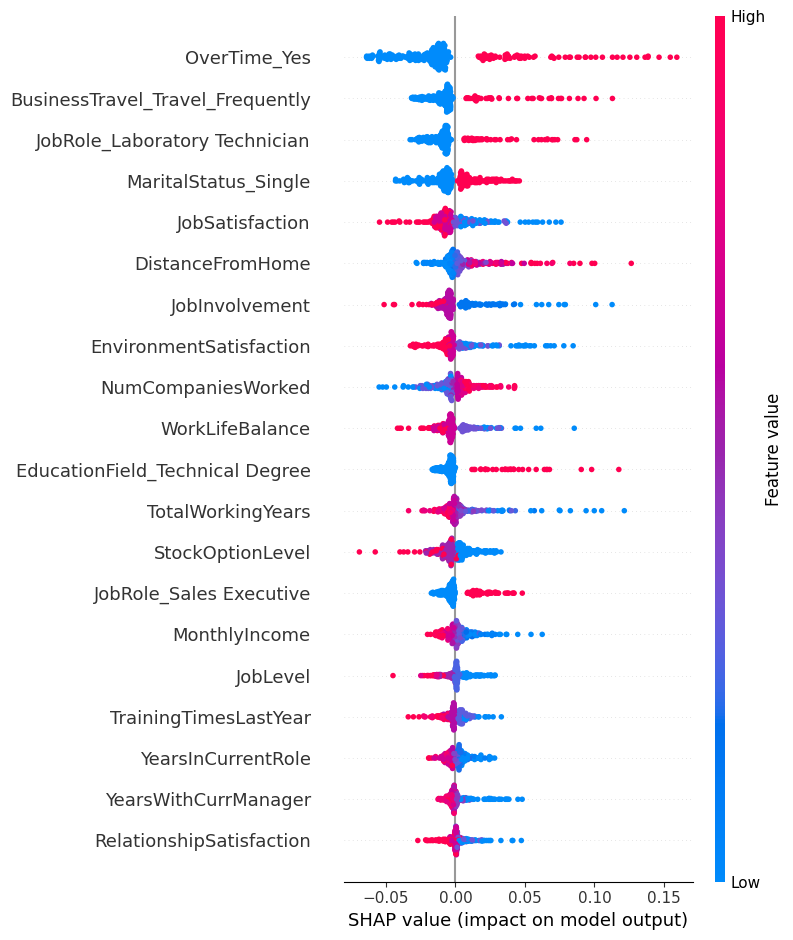

In [ ]:
import shap
import torch
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=X.columns)

X_test_np = X_test_df.to_numpy()

background_data = shap.sample(X_test_df, 50)  # Adjust K based on memory & speed

def model_predict(X_numpy):
    X_tensor = torch.tensor(X_numpy, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability of Attrition = Yes (class 1)
    return probs.numpy()

explainer = shap.KernelExplainer(model_predict, background_data.to_numpy())

shap_values = explainer.shap_values(X_test_np)

shap.summary_plot(shap_values, X_test_df)


# SHAP Analysis & Retention Strategies  

The SHAP summary plot illustrates how different features influence employee attrition.

**Positive SHAP values** indicate a higher likelihood of leaving, while **negative values** suggest retention.

The color gradient (blue = low value, red = high value) highlights key trends.  

## Key Findings & HR Recommendations  

###  **Overtime Significantly Increases Attrition**  
- Employees who **frequently work overtime** exhibit the highest likelihood of leaving. Prolonged work hours may lead to burnout and dissatisfaction.  
- **Recommendations:**  
  - Implement **overtime management policies** to cap excessive work hours.  
  - Provide **compensatory leave options** to offset extended work periods.  
  - Offer **additional incentives for overtime**, including performance bonuses or time-off benefits.  
    

###  **Frequent Business Travel Contributes to High Attrition**  
- IBM employees who **travel frequently for client engagements and global projects** face exhaustion, personal life disruption, and lower job satisfaction.  
- **Recommendations:**  
  - Promote the use of **IBM’s advanced virtual collaboration tools**, such as Watson-powered video conferencing, to reduce travel dependencies.  
  - Offer **flexible scheduling and additional leave benefits** to employees frequently engaged in on-site client work.  
  - Expand IBM’s **Remote Work & Hybrid Work Policy**, allowing consultants and technical teams to balance travel commitments more effectively.  

###  **Certain Job Roles Have a Higher Attrition Rate**  
- Employees in roles such as **Laboratory Technicians and Sales Executives** show higher attrition due to job stress, limited growth opportunities, or market competitiveness.  
- **Recommendations:**  
  - Conduct **job role-specific engagement programs** to address pain points.  
  - Provide **targeted training and career development plans** to retain employees in these roles.  


###  **Single Employees Are More Likely to Leave**  
- Single employees have a **higher attrition rate**, possibly due to fewer personal commitments binding them to the company.  
- **Recommendations:**  
  - Develop **networking and team-building initiatives** to improve workplace social bonds.  
  - Organize team outings, social gatherings, and informal office events to foster a collaborative and engaging work environment

###  **Job Satisfaction and Work Environment Play a Critical Role**  
- Employees reporting **low job satisfaction** or **negative work environment perceptions** have an increased likelihood of leaving.  
- **Recommendations:**  
  - Implement **structured feedback loops** through regular employee satisfaction surveys.    
  - Improve workplace culture through **recognition programs** and open-door policies.  


###  **Salary & Career Growth Influence Retention**  
- Employees with **lower income** and **limited career progression** show higher attrition rates.  
- **Recommendations:**  
  - Conduct **annual salary benchmarking** to ensure competitiveness with industry standards.  
  - Develop **structured promotion frameworks** to provide clear career advancement opportunities.  
  - Offer **performance-based bonuses** to retain high-performing employees.  

###  **Years in Current Role and with Current Manager Impact Retention**  
- Employees who remain in the **same role or with the same manager for extended periods** tend to leave due to stagnation or leadership conflicts.  
- **Recommendations:**  
  - Implement **internal mobility programs** that encourage lateral moves and skill development.   


### **Top Factors Affecting Attrition & Key Recommendations**  

| **Feature** | **Recommendation** |  
|------------|------------------|  
| **Overtime** | Limit excessive work hours & provide compensatory leave. |  
| **Frequent Business Travel** | Reduce travel & introduce WFH/hybrid policies. |  
| **Job Satisfaction** | Conduct surveys & implement recognition programs. |  
| **Salary & Career Growth** | Perform salary benchmarking & offer performance-based bonuses. |  
| **Years in Current Role** | Introduce internal mobility programs & encourage lateral moves. |  
  


## Conclusion  

The model's SHAP analysis reveals that attrition is **primarily driven by workload, travel, job role challenges, salary concerns, and job satisfaction levels**.

By addressing the factors listed above, HR teams can **improve employee retention, increase job satisfaction, and proactively mitigate attrition risks**.  


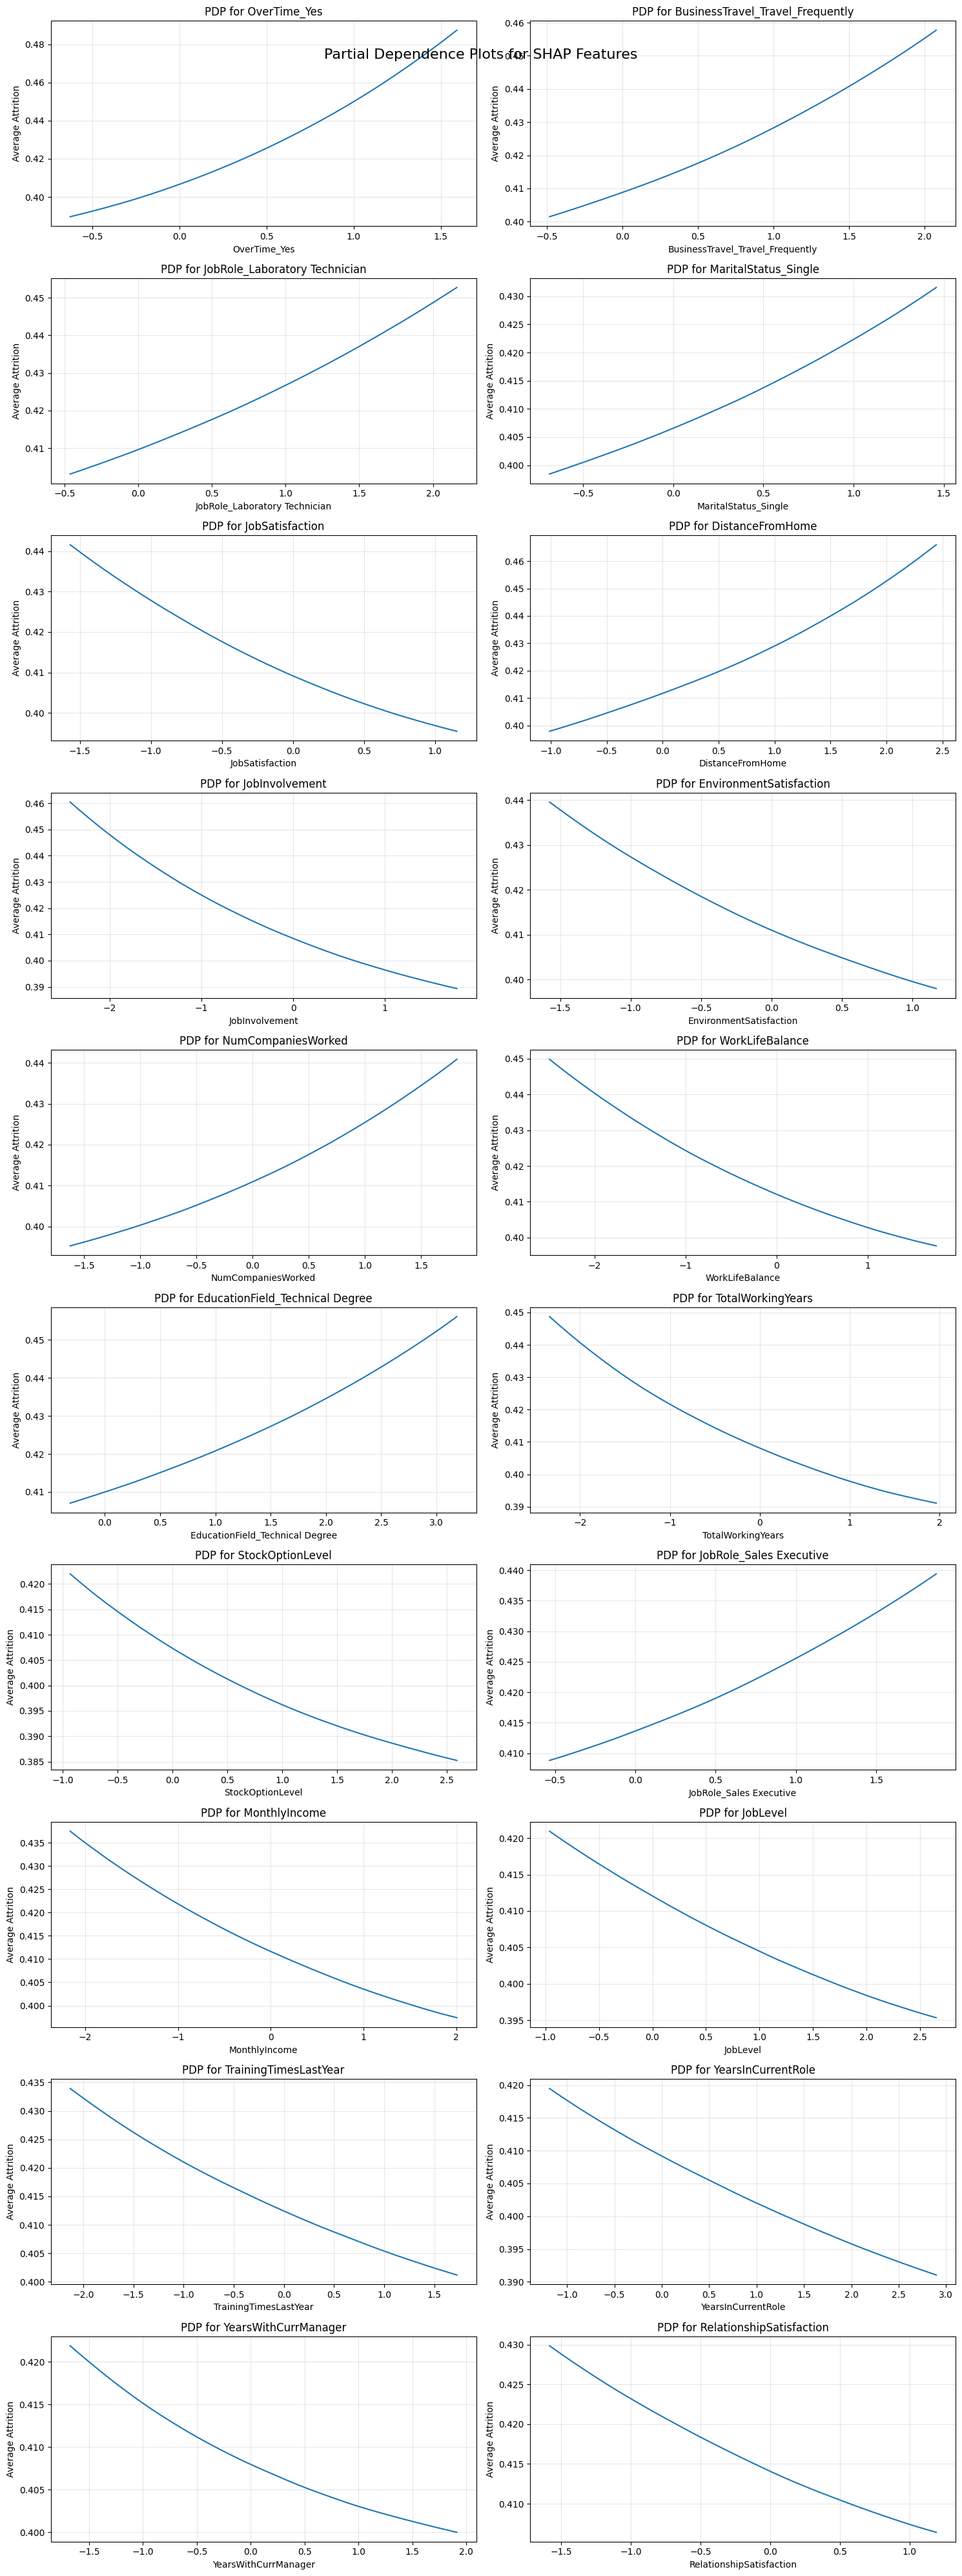

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of selected features from SHAP plot
shap_features = [
    'OverTime_Yes', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician',
    'MaritalStatus_Single', 'JobSatisfaction', 'DistanceFromHome', 'JobInvolvement',
    'EnvironmentSatisfaction', 'NumCompaniesWorked', 'WorkLifeBalance',
    'EducationField_Technical Degree', 'TotalWorkingYears', 'StockOptionLevel',
    'JobRole_Sales Executive', 'MonthlyIncome', 'JobLevel', 'TrainingTimesLastYear',
    'YearsInCurrentRole', 'YearsWithCurrManager', 'RelationshipSatisfaction'
]

# Ensure cols is properly defined
if not isinstance(X_test, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test, columns=feature_names)  # Use predefined feature names
else:
    X_test_df = X_test

# Ensure cols is a list of column names
if not isinstance(cols, list):
    cols = list(X_test_df.columns)  # Fix to ensure cols is correctly set

# Function to get predictions from PyTorch model
def torch_predict(model, X):
    """Get predictions from PyTorch model"""
    X_tensor = torch.tensor(X, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor)
        if outputs.shape[1] == 1:
            probs = torch.sigmoid(outputs).numpy().flatten()
        else:
            probs = torch.nn.functional.softmax(outputs, dim=1).numpy()
            probs = probs[:, 1]  # Get probability of positive class
    return probs

# Custom Partial Dependence Plot calculation
def custom_pdp(model, X, feature_idx, grid_resolution=50):
    """
    Calculate Partial Dependence for a given feature
    """
    if isinstance(X, pd.DataFrame):
        X = X.values

    feature_min = X[:, feature_idx].min()
    feature_max = X[:, feature_idx].max()
    grid_values = np.linspace(feature_min, feature_max, grid_resolution)
    pdp_values = np.zeros(grid_resolution)

    for i, val in enumerate(grid_values):
        X_temp = X.copy()
        X_temp[:, feature_idx] = val
        preds = torch_predict(model, X_temp)
        pdp_values[i] = np.mean(preds)

    return grid_values, pdp_values

# Function to create PDP plots for SHAP-selected features
def plot_pdp(model, X, feature_names, cols=None, grid_resolution=50):
    """Create PDP plots for SHAP-important features"""
    if cols is None:
        feature_indices = list(range(len(feature_names)))
    else:
        feature_indices = [cols.index(name) for name in feature_names if name in cols]

    n_features = len(feature_indices)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

    if n_rows == 1:
        axes = np.array([axes])

    for i, (name, idx) in enumerate(zip(feature_names, feature_indices)):
        row, col = i // n_cols, i % n_cols
        ax = axes[row, col]

        grid_values, pdp_values = custom_pdp(model, X, idx, grid_resolution)

        ax.plot(grid_values, pdp_values)
        ax.set_title(f'PDP for {name}')
        ax.set_xlabel(name)
        ax.set_ylabel('Average Attrition')
        ax.grid(True, alpha=0.3)

    for i in range(len(feature_names), n_rows * n_cols):
        row, col = i // n_cols, i % n_cols
        axes[row, col].set_visible(False)

    plt.tight_layout()
    return fig

# Generate PDP plots
if __name__ == "__main__":
    pdp_fig = plot_pdp(model, X_test_df, shap_features, cols=cols, grid_resolution=50)
    pdp_fig.suptitle('Partial Dependence Plots for SHAP Features', fontsize=16)
    plt.show()


### **Key Findings from Partial Dependence Plots (PDPs)**  

1. **Overtime & Business Travel** → Higher overtime and frequent travel significantly increase attrition risk.  
2. **Job Roles** → Laboratory Technicians and Sales Executives have higher attrition likelihood.  
3. **Marital Status** → Single employees are more prone to leaving.  
4. **Job Satisfaction & Involvement** → Higher satisfaction and involvement **reduce** attrition.  
5. **Environment Satisfaction & Work-Life Balance** → A positive environment and work-life balance **lower attrition**.  
6. **Career Growth & Stability** → More years in a current role, better stock options, and higher income **reduce attrition**.  
7. **Training & Manager Relationships** → Regular training and strong manager relationships **decrease** attrition.  

### **Validation with SHAP Insights**  
- These PDP insights **align with the SHAP results**, reinforcing previous findings.  
- **Recommendations already made**—like improving work-life balance, reducing excessive travel, and enhancing career growth—are validated by this analysis.  
- This dual-validation confirms that addressing these factors can effectively mitigate attrition.


# **Local Explainability**  

### **Understanding Local Explainability**  
While **global explainability** helps in understanding overall trends, **local explainability** focuses on individual predictions. It answers **why a specific employee, initially predicted to stay, would instead leave given small changes in certain factors**.  

### **Counterfactual Explanations**  
To achieve local explainability, we use **counterfactual analysis**, which explores **"what-if" scenarios** by analyzing cases where the model's prediction changes from **No Attrition → Yes Attrition**. This helps identify the **most influential factors driving attrition**.  

### **How Counterfactuals Work**  
1. Take an employee initially predicted to **stay**.  
2. Identify **small feature changes** (e.g., increased overtime, lower job satisfaction) that **flip the prediction** to “leave.”  
3. These changes reveal the **most critical risk factors** for attrition.  

### **Comprehensive Counterfactual Analysis**  
- We apply counterfactual analysis **to all employees in the test set** who were initially predicted to **stay** but could switch to **leave** with minimal changes.  
- The features requiring the **most frequent changes** across employees are **ranked** to identify **key drivers of attrition**.  

### **Insights from Counterfactuals**  
- Highlights **key triggers** that push employees towards attrition.  
- Helps HR teams **pinpoint high-risk areas** for targeted interventions.  
- Enables **proactive decision-making**, such as offering role adjustments, salary hikes, or reducing work pressure.  


In [ ]:
!pip install lime

In [ ]:
import torch
import torch.optim as optim
import pandas as pd


# Ensure that X_test is a pandas DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)


feature_names = [
    'Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
    'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
    'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
    'Department_Sales', 'EducationField_Life Sciences',
    'EducationField_Marketing', 'EducationField_Medical',
    'EducationField_Other', 'EducationField_Technical Degree',
    'JobRole_Human Resources', 'JobRole_Laboratory Technician',
    'JobRole_Manager', 'JobRole_Manufacturing Director',
    'JobRole_Research Director', 'JobRole_Research Scientist',
    'JobRole_Sales Executive', 'JobRole_Sales Representative',
    'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes'
]

def generate_counterfactual(model, X_instance, target_class, feature_names, lr=0.01, steps=100):
    X_array = X_instance.values
    X_cf = torch.tensor(X_array, dtype=torch.float32, requires_grad=True)
    optimizer = optim.Adam([X_cf], lr=lr)
    model.eval()

    for step in range(steps):
        optimizer.zero_grad()
        output = model(X_cf.unsqueeze(0))

        if output.shape[1] > 1:
            output = output[0, target_class]
        else:
            output = output.squeeze()

        prob = torch.sigmoid(output).item()
        target_tensor = torch.tensor([target_class], dtype=torch.float32)
        loss = torch.nn.functional.binary_cross_entropy_with_logits(output.unsqueeze(0), target_tensor)

        loss.backward()
        optimizer.step()

        new_pred = (prob >= 0.5)
        if new_pred == target_class:
            break

    return pd.DataFrame([X_cf.detach().numpy()], columns=feature_names)

if isinstance(X_test, pd.DataFrame):
    X_test.columns = feature_names
else:
    raise ValueError("X_test must be a Pandas DataFrame.")

feature_names = list(X_test.columns)

significance_threshold = 0.1
feature_change_counts_no_to_yes = {feature: 0 for feature in feature_names}

counterfactuals = []

for i in range(len(X_test)):
    with torch.no_grad():
        input_tensor = torch.tensor(X_test.iloc[i].values, dtype=torch.float32).unsqueeze(0)
        original_output = model(input_tensor)

        if original_output.shape[1] > 1:
            original_class = original_output.argmax(dim=1).item()
        else:
            original_class = int(torch.sigmoid(original_output).round().item())

    if original_class == 0:
        desired_class = 1
        counterfactual_instance_df = generate_counterfactual(model, X_test.iloc[i], desired_class, feature_names)

        original_instance_df = pd.DataFrame(X_test.iloc[i]).T
        counterfactual_instance_df.index = original_instance_df.index

        counterfactuals.append(counterfactual_instance_df)

        for feature in feature_names:
            original_value = original_instance_df.iloc[0][feature]
            counterfactual_value = counterfactual_instance_df.iloc[0][feature]
            change = abs(original_value - counterfactual_value)

            if change > significance_threshold:
                feature_change_counts_no_to_yes[feature] += 1

sorted_features_no_to_yes = sorted(feature_change_counts_no_to_yes.items(), key=lambda x: x[1], reverse=True)

top_changed_features_no_to_yes = [f"{feature}: {count}" for feature, count in sorted_features_no_to_yes[:10] if count > 0]

print("\nCounterfactual explanations generated for all test instances.")

print("\nTop features that increased attrition risk (No → Yes):")
if top_changed_features_no_to_yes:
    for rank, feature in enumerate(top_changed_features_no_to_yes, 1):
        print(f"{rank}. {feature}")
else:
    print("No significant features detected under the given threshold.")

if top_changed_features_no_to_yes:
    print("\nEmployees who left were most influenced by:")
    print(", ".join([f.split(':')[0] for f in top_changed_features_no_to_yes[:5]]))



Counterfactual explanations generated for all test instances.

Top features that increased attrition risk (No → Yes):
1. BusinessTravel_Travel_Frequently: 220
2. Education: 218
3. EnvironmentSatisfaction: 217
4. JobInvolvement: 216
5. EducationField_Life Sciences: 215
6. YearsWithCurrManager: 214
7. EducationField_Medical: 214
8. JobRole_Sales Executive: 214
9. DistanceFromHome: 213
10. OverTime_Yes: 212

Employees who left were most influenced by:
BusinessTravel_Travel_Frequently, Education, EnvironmentSatisfaction, JobInvolvement, EducationField_Life Sciences


## **Key Counterfactual Insights**  

### **Dominant Factors Driving Attrition (No → Yes)**  
From counterfactual analysis, the **most frequent changes** that increased attrition risk were:  
- **Frequent Business Travel** (220 instances)  
- **Education Level** (218 instances)  
- **Low Environment Satisfaction** (217 instances)  
- **Low Job Involvement** (216 instances)  
- **Life Sciences Education Field** (215 instances)  

### **Alignment with SHAP & PDP Analysis**  
- **SHAP Importance**: Business travel, education, environment satisfaction, and job involvement were key SHAP contributors.  
- **PDP Trends**: Partial dependence plots confirm that **higher travel frequency, lower satisfaction, and lower involvement** lead to **higher attrition rates**.  

### **Conclusion**  
- The **counterfactual results strongly align** with SHAP and PDP insights, reinforcing that **work conditions, career growth, and travel demands** are critical attrition drivers.  
- HR strategies should focus on **reducing excessive travel, improving work environment satisfaction, and enhancing engagement programs** to mitigate attrition risks.  


# **Strategic HR Recommendations for Reducing Attrition**  

Attrition is driven by multiple workplace factors, including **overtime, frequent travel, job role challenges, job satisfaction, work-life balance, and career growth opportunities**. The following recommendations, backed by **SHAP, PDP, and Counterfactual Analysis**, will help **improve employee retention** and foster a **more engaged workforce**.  

---

## **1️⃣ Overtime Management**  
**Issue:** Excessive work hours increase burnout, leading to higher attrition.  
**HR Action Plan:**  
✔ Implement **overtime limits** and **monitor workload distribution**.  
✔ Offer **compensatory leave options** to balance extended work periods.  
✔ Provide **performance-based incentives** for necessary overtime.  

---

## **2️⃣ Business Travel Optimization**  
**Issue:** Frequent travel causes exhaustion and disrupts work-life balance.  
**HR Action Plan:**  
✔ Reduce **non-essential travel** by encouraging **virtual meetings**.  
✔ Implement **hybrid work policies** to allow flexibility.  
✔ Offer **extra leave** or travel perks for employees with high travel demands.  

---

## **3️⃣ Addressing High-Turnover Job Roles**  
**Issue:** Sales Executives and Laboratory Technicians face **higher stress and career stagnation**.  
**HR Action Plan:**  
✔ Design **role-specific engagement programs** to address key pain points.  
✔ Provide **structured career development** and skill enhancement opportunities.  

---

## **4️⃣ Enhancing Work-Life Balance & Environment Satisfaction**  
**Issue:** Employees with **low job satisfaction and negative work environments** are more likely to leave.  
**HR Action Plan:**  
✔ Conduct **regular employee feedback surveys** to track satisfaction.  
✔ Introduce **recognition and appreciation programs** to boost morale.  
✔ Enhance **flexible work policies** to improve work-life balance.  

---

## **5️⃣ Retaining Single Employees**  
**Issue:** Employees who are **single** have a **higher likelihood of leaving** due to weaker workplace social ties.  
**HR Action Plan:**  
✔ Organize **team outings, networking events, and social initiatives**.  
✔ Foster an **inclusive work culture** with community-building programs.  

---

## **6️⃣ Career Growth & Salary Competitiveness**  
**Issue:** Employees with **low salary growth and career stagnation** have a higher attrition risk.  
**HR Action Plan:**  
✔ Conduct **annual salary benchmarking** to stay competitive.  
✔ Implement **structured promotion frameworks** to provide career progression.  
✔ Offer **performance-based incentives** to retain top talent.  

---

## **7️⃣ Encouraging Internal Mobility & Strong Manager Relationships**  
**Issue:** Staying in the same role for too long without growth leads to disengagement.  
**HR Action Plan:**  
✔ Promote **internal mobility programs** to encourage lateral movement.  
✔ Develop **mentorship initiatives** to strengthen manager-employee relationships.  

---

## **Final Takeaway**  
To **reduce attrition effectively**, HR teams must **proactively address key workplace challenges**. By **optimizing workload, reducing travel burdens, strengthening job roles, fostering workplace engagement, and ensuring career growth**, organizations can create a **thriving and committed workforce**.  

